In [1]:
%load_ext autoreload

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [3]:
reco = "DeepSC_AlgoC"
input_folder_pho = "/eos/user/v/vdurupt/reco_comparison_corrected/supercluster_regression/photons"
input_folder_ele = "/eos/user/v/vdurupt/reco_comparison_corrected/supercluster_regression/electrons"

output_folder = f"/eos/user/v/vdurupt/reco_comparison_corrected/RecoPlots/RecoComparison_finalObjRegression_UL18_v1/Comparaison_ele_pho/{reco}"
os.makedirs(output_folder, exist_ok=True)

In [4]:
#df_1 = df_pho
#df_2 = df_ele qui etait moustache dans l'ancien code
df_pho = pd.HDFStore(f"{input_folder_pho}/pho_UL18_123X_{reco}_object.h5py", "r")["df"]
df_ele = pd.HDFStore(f"{input_folder_ele}/ele_UL18_123X_{reco}_object.h5py", "r")["df"]

df_pho.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_ele.rename(columns={"output_object.csv":"obj_index"}, inplace=True)

df_pho = df_pho.iloc[:-1]
df_ele = df_ele.iloc[:-1]


In [5]:
df_pho.loc[df_pho.sc_matched==True, "has_sc"] = 1
df_ele.loc[df_ele.sc_matched==True, "has_sc"] = 1
df_pho.loc[df_pho.sc_matched==False, "has_sc"] = 0
df_ele.loc[df_ele.sc_matched==False, "has_sc"] = 0

# Gen-matching study

In [6]:
print(f"N. photon tot in EB ({reco}): {df_pho[df_pho.pho_eta<1.566].shape[0]}")
print(f"N. electron tot in EB ({reco}): {df_ele[df_ele.ele_eta<1.566].shape[0]}")
print(f"N. photon with matched SC in EB ({reco}): {df_pho[df_pho.pho_eta<1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EB ({reco}): {df_ele[df_ele.ele_eta<1.566].has_sc.sum()}")
print(f"N. photon GenMatched in EB ({reco}): {df_pho[(df_pho.pho_eta<1.566)&(df_pho.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EB ({reco}): {df_ele[(df_ele.ele_eta<1.566)&(df_ele.has_sc==1)].genmatched.sum()}")

N. photon tot in EB (DeepSC_AlgoC): 1372085
N. electron tot in EB (DeepSC_AlgoC): 1565906
N. photon with matched SC in EB (DeepSC_AlgoC): 1372085.0
N. electron with matched SC in EB (DeepSC_AlgoC): 1364084.0
N. photon GenMatched in EB (DeepSC_AlgoC): 1319327.0
N. electron GenMatched in EB (DeepSC_AlgoC): 1281852.0


In [7]:
print(f"N. photon tot in EE ({reco}): {df_pho[df_pho.pho_eta>1.566].shape[0]}")
print(f"N. electron tot in EE ({reco}): {df_ele[df_ele.ele_eta>1.566].shape[0]}")
print(f"N. photon with matched SC in EE ({reco}): {df_pho[df_pho.pho_eta>1.566].has_sc.sum()}")
print(f"N. electron with matched SC in EE ({reco}): {df_ele[df_ele.ele_eta>1.566].has_sc.sum()}")
print(f"N. photon GenMatched in EE ({reco}): {df_pho[(df_pho.pho_eta>1.566)&(df_pho.has_sc==1)].genmatched.sum()}")
print(f"N. electron GenMatched in EE ({reco}): {df_ele[(df_ele.ele_eta>1.566)&(df_ele.has_sc==1)].genmatched.sum()}")

N. photon tot in EE (DeepSC_AlgoC): 419168
N. electron tot in EE (DeepSC_AlgoC): 415350
N. photon with matched SC in EE (DeepSC_AlgoC): 419168.0
N. electron with matched SC in EE (DeepSC_AlgoC): 376529.0
N. photon GenMatched in EE (DeepSC_AlgoC): 398068.0
N. electron GenMatched in EE (DeepSC_AlgoC): 348468.0


# Plotting basic distribution to compare matched and not-matched electrons

In [8]:
#On normalise comment ? En divisant par le nombre de photons/electrons dans la zone qui nous intéresse
def plot_distribution(pho_var, ele_var, label, bins, xrange, output_folder, ylog=False, split_EEEB='Inclusive'):
    os.makedirs(output_folder, exist_ok=True)
    #os.system(f"cp /eos/user/d/dvalsecc/www/index.php {output_folder}")
    
    fig = plt.figure(figsize=(17,9), dpi=200)
    gs = fig.add_gridspec(2,2, hspace=0.05, height_ratios=[0.75,0.25])
    axs = gs.subplots(sharex=True)
    plt.subplots_adjust(wspace=0.3)
    
    ax =  axs[0][0]
    axr =  axs[1][0]
    az = axs[0][1]
    azr =  axs[1][1]

    
    if split_EEEB == "EB":
        B, binX, _ = ax.hist(df_ele[(df_ele.genmatched!=1)&(df_ele.ele_eta.abs()<1.4442)][ele_var], 
                             bins=bins, range=xrange, label="electrons", histtype='step', linewidth=2)
        A, binX, _ = ax.hist(df_pho[(df_pho.genmatched!=1)&(df_pho.pho_eta.abs()<1.4442)][pho_var], 
                             bins=bins, range=xrange, label="photons", histtype='step', linewidth=2)
    elif split_EEEB == "EE":
        B, binX, _ = ax.hist(df_ele[(df_ele.genmatched!=1)&(df_ele.ele_eta.abs()>1.566)][ele_var], 
                             bins=bins, range=xrange, label="electrons", histtype='step', linewidth=2)
        A, binX, _ = ax.hist(df_pho[(df_pho.genmatched!=1)&(df_pho.pho_eta.abs()>1.566)][pho_var], 
                             bins=bins, range=xrange, label="photons", histtype='step', linewidth=2)
    elif split_EEEB == "Inclusive":
        B, binX, _ = ax.hist(df_ele[(df_ele.genmatched!=1)][ele_var], 
                             bins=bins, range=xrange, label="electrons", histtype='step', linewidth=2)
        A, binX, _ = ax.hist(df_pho[(df_pho.genmatched!=1)][pho_var], 
                             bins=bins, range=xrange, label="photons", histtype='step', linewidth=2)
    ax.legend()
    axr.set_xlabel(label)
    ax.text(0.1,0.8, f"Not-matched\nphoton/electrons\n{split_EEEB}", transform=ax.transAxes, fontsize=18)
    hep.cms.label(rlabel="14 TeV", loc=0, ax=ax) 
    
        #max(min(min(A), min(B)) , 1e-3)
        #max(max(A)*500, max(B)*500)
    if ylog:
        ax.set_ylim(max(min(min(A), min(B)) , 1e-3), max(max(A)*500, max(B)*500))
        ax.set_yscale("log")
    else:
        #(0, max(max(A)*1.4, max(B)*1.4))
        ax.set_ylim(0, max(max(A)*1.4, max(B)*1.4))

              
    aux_min = min(B[np.nonzero(B)]) #valeur minimale non nulle de B (pour traiter les cas où B = 0 qui posent des problemes de division par 0)
    compteur_nan = 0
    for i in range(len(B)):
        if B[i] == 0 :
            B[i] = aux_min/1000 #Au lieu de prendre 0, on prend la valeur minimale de B et on la divise par 100 pour obtenir une erreur importante (où est ce que ça apparaît ??)
            compteur_nan += 1
    print("Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :")
    print(compteur_nan)
    #B[np.nonzero(B)] permet d'enlever les éléments nuls de B
    
    errA = np.sqrt(A)
    errB = np.sqrt(B)
    errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)

    axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
                                fmt=".", linestyle='none', elinewidth=1, c="black")
    
    #LA REFERENCE DE L'ERREUR EST : (normalement c'est B car c'était moustache dans le code) donc l'erreur est sur la reference electrons ?
    deltaM = np.max(np.abs((A/B)-1))
    if np.isnan(deltaM):
        deltaM = 2
    
    axr.set_ylim(1-deltaM*1.2, 1+deltaM*1.2)
    axr.set_ylabel("$\gamma/e$")
    axr.grid(which="both",axis="y")
    axr.plot([binX[0], binX[-2]], [1.,1.], linewidth=2, c="black")


    if split_EEEB == "EB":
        B, binX, _ = az.hist(df_ele[(df_ele.genmatched==1)&(df_ele.ele_eta.abs()<1.4442)][ele_var], 
                             bins=bins, range=xrange, label="electrons", histtype='step', linewidth=2)
        A, binX, _ = az.hist(df_pho[(df_pho.genmatched==1)&(df_pho.pho_eta.abs()<1.4442)][pho_var], 
                             bins=bins, range=xrange, label="photons", histtype='step', linewidth=2)
    elif split_EEEB == "EE":
        B, binX, _ = az.hist(df_ele[(df_ele.genmatched==1)&(df_ele.ele_eta.abs()>1.566)][ele_var], 
                             bins=bins, range=xrange, label="electrons", histtype='step', linewidth=2)
        A, binX, _ = az.hist(df_pho[(df_pho.genmatched==1)&(df_pho.pho_eta.abs()>1.566)][pho_var], 
                             bins=bins, range=xrange, label="photons", histtype='step', linewidth=2)
    elif split_EEEB == "Inclusive":
        B, binX, _ = az.hist(df_ele[(df_ele.genmatched==1)][ele_var], 
                             bins=bins, range=xrange, label="electrons", histtype='step', linewidth=2)
        A, binX, _ = az.hist(df_pho[(df_pho.genmatched==1)][pho_var], 
                             bins=bins, range=xrange, label="photons", histtype='step', linewidth=2)
    az.legend()
    azr.set_xlabel(label)
    az.text(0.1,0.8, f"GEN-matched\nphotons/electrons\n{split_EEEB}", transform=az.transAxes,fontsize=18)
    hep.cms.label(rlabel="14 TeV", loc=0, ax=az) 
    if ylog:
        #max(min(min(A), min(B)) , 1e-3)
        #max(max(A)*100, max(B)*100)
        az.set_ylim(max(min(min(A), min(B)) , 1e-3), max(max(A)*100, max(B)*100))
        az.set_yscale("log")
    else:
        #(0, max(max(A)*1.4, max(B)*1.4))
        az.set_ylim(0, max(max(A)*1.4, max(B)*1.4))

    
    aux_min = min(B[np.nonzero(B)]) #valeur minimale non nulle de B (pour traiter les cas où B = 0 qui posent des problemes de division par 0)
    compteur_nan = 0
    for i in range(len(B)):
        if B[i] == 0 :
            B[i] = aux_min/1000
            compteur_nan += 1
    print("Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :")
    print(compteur_nan)
    #B[np.nonzero(B)] permet d'enlever les éléments nuls de B        
        
    errA = np.sqrt(A)
    errB = np.sqrt(B)
    errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)

    azr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
                                fmt=".", linestyle='none', elinewidth=1,c="black") #plots de bas gamma/e
    azr.grid(which="both",axis="y")
    azr.plot([binX[0], binX[-2]], [1.,1.], linewidth=2, c="black")
    azr.set_ylabel("$\gamma/e$")
    deltaM = np.max(np.abs((A/B)-1))
    if np.isnan(deltaM):
        deltaM = 2
    azr.set_ylim(1-deltaM*1.2, 1+deltaM*1.2)

    fig.savefig(output_folder + f"/{pho_var}_{split_EEEB}_matched_notmatched_comparison.png")
    fig.savefig(output_folder + f"/{pho_var}_{split_EEEB}matched_notmatched_comparison.pdf")
    fig.savefig(output_folder + f"/{pho_var}_{split_EEEB}matched_notmatched_comparison.svg")

In [9]:
df_pho.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'pho_eta', 'pho_phi', 'pho_energy', 'pho_et', 'pho_scRawEnergy',
       'pho_e5x5', 'pho_e3x3', 'pho_sigmaIEtaIEta', 'pho_sigmaIEtaIPhi',
       'pho_sigmaIPhiIPhi', 'pho_hademCone', 'ncls_sel', 'ncls_sel_true',
       'ncls_sel_false', 'ncls_true', 'ncls_tot', 'ncls_missing', 'en_sc_raw',
       'et_sc_raw', 'en_sc_calib', 'et_sc_calib', 'calo_en_gen', 'calo_et_gen',
       'calo_en_sim', 'calo_et_sim', 'calo_geneta', 'calo_genphi',
       'calo_simeta', 'calo_simphi', 'calo_genpt', 'genpart_en', 'genpart_et',
       'gen_eta', 'gen_phi', 'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU',
       'eventId', 'runId', 'has_sc'],
      dtype='object')

In [10]:
df_ele.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


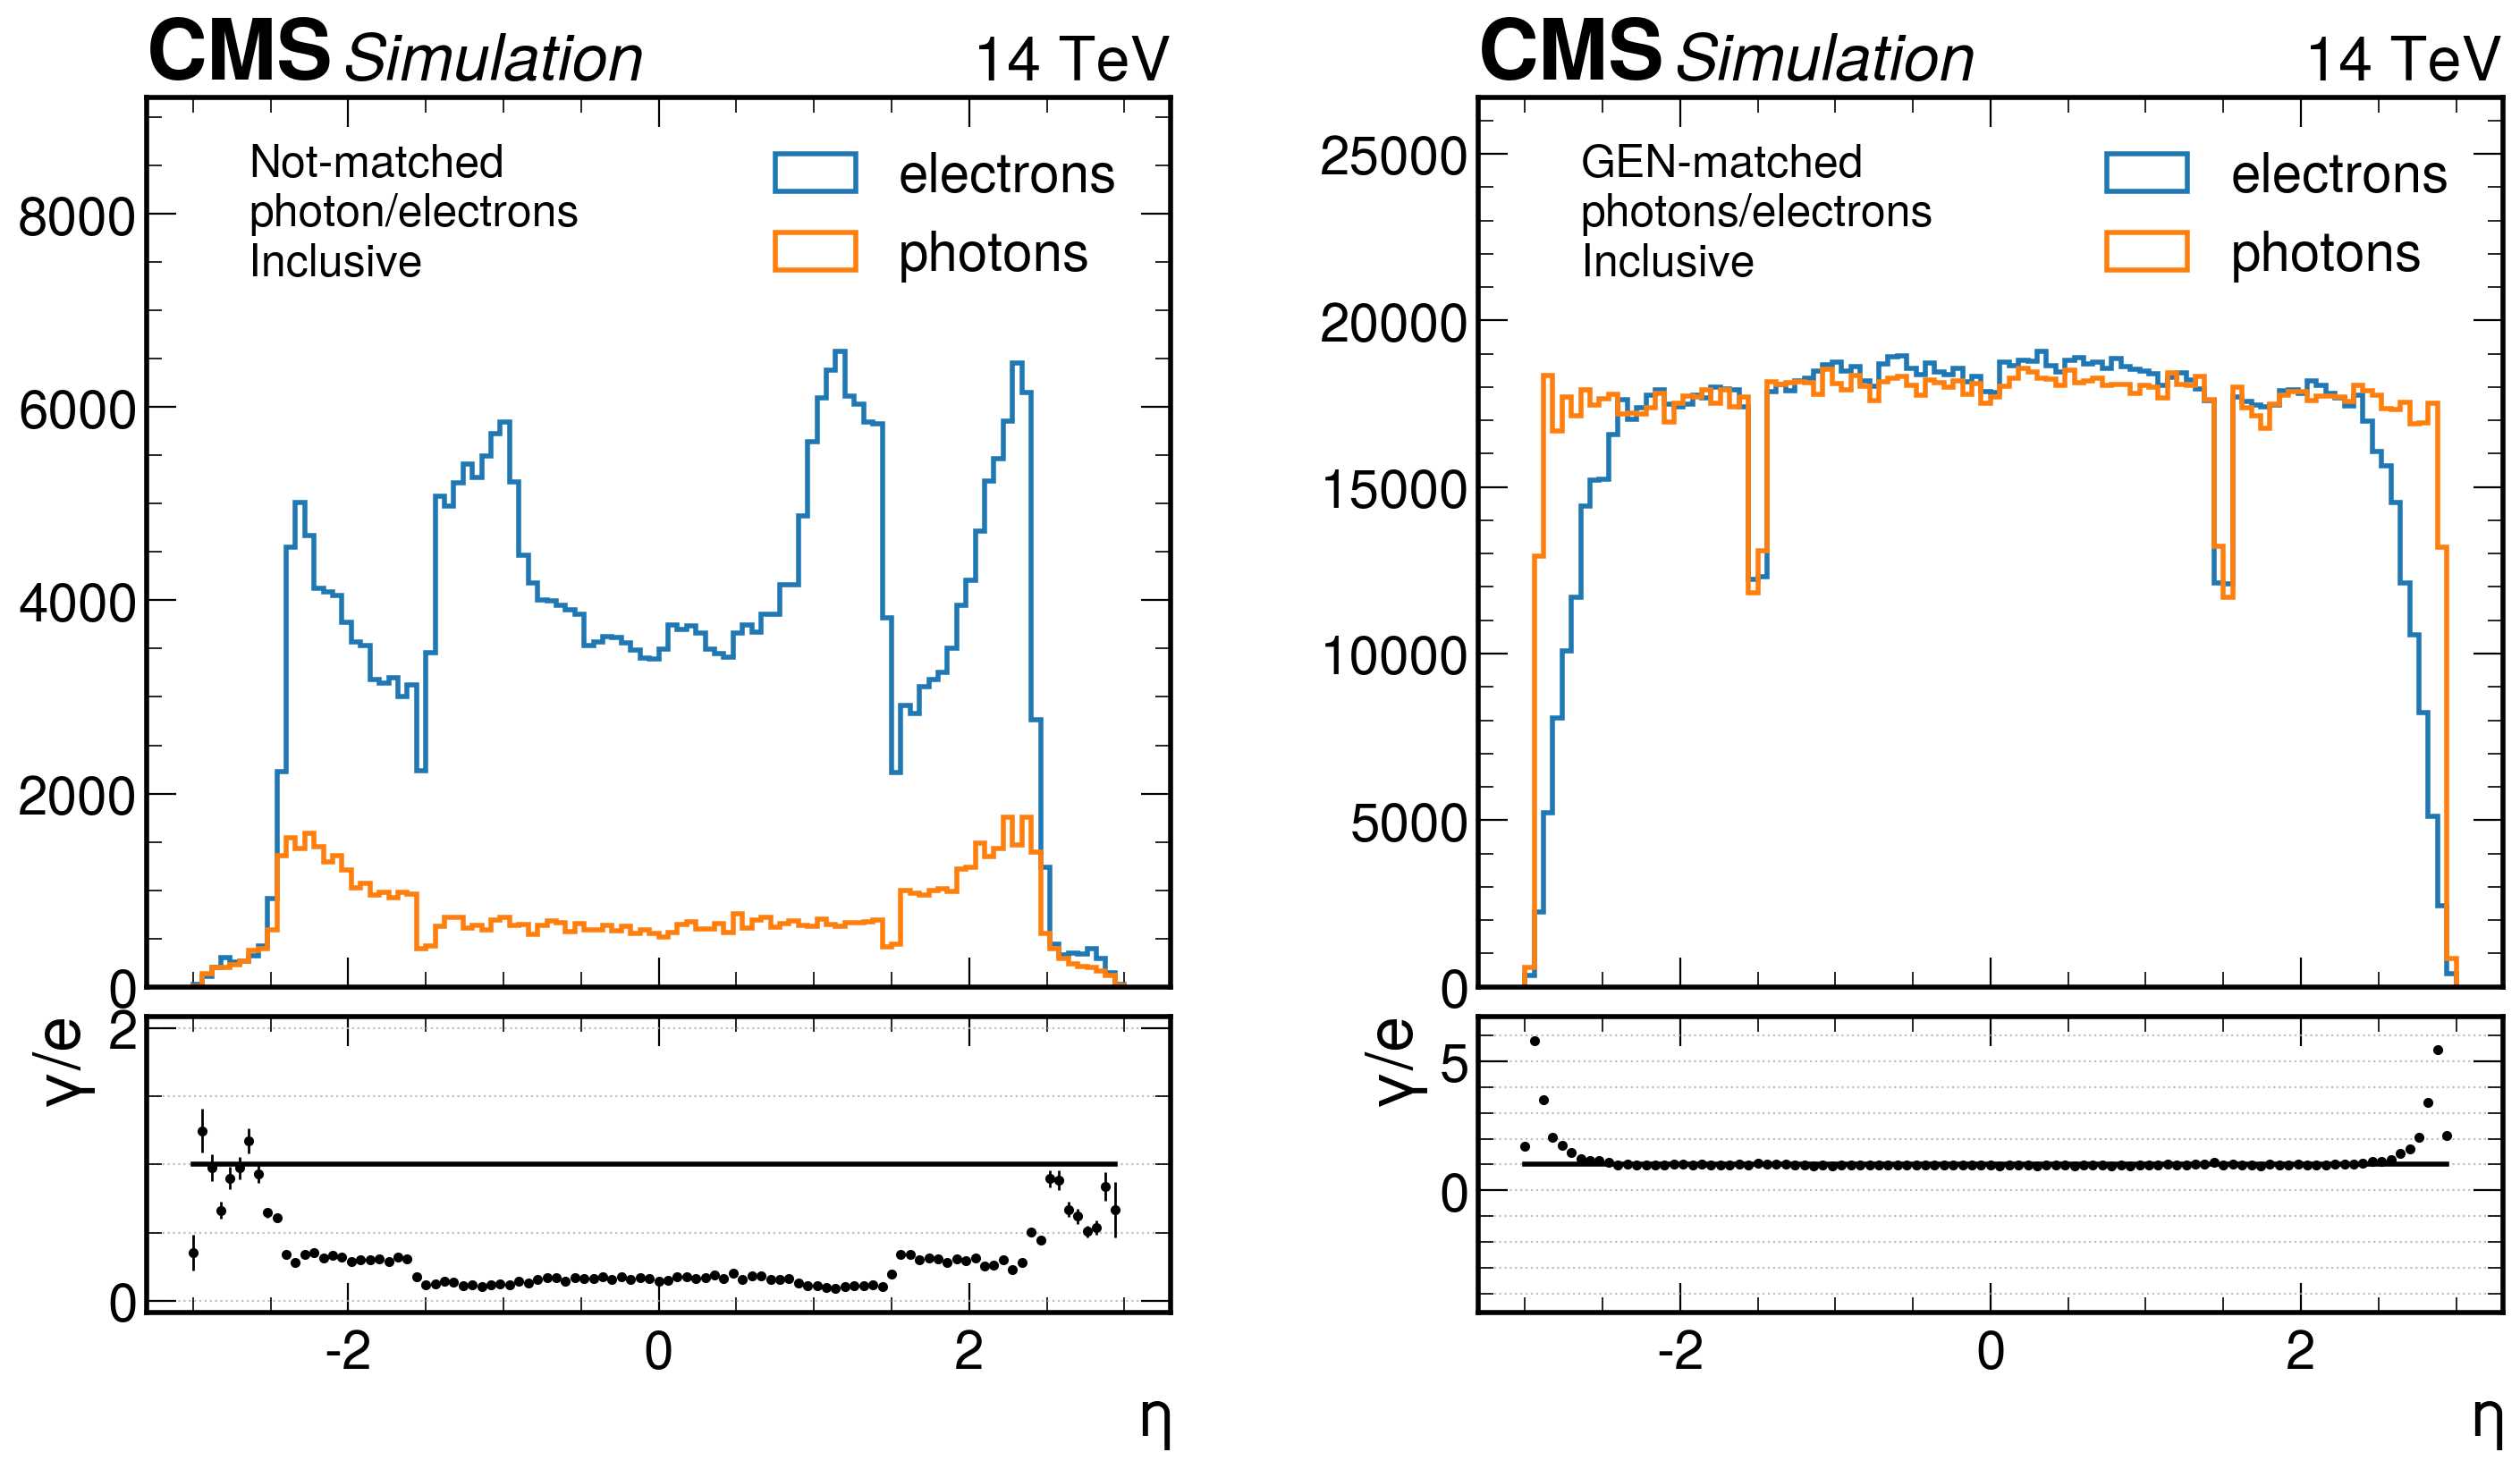

In [11]:
plot_distribution("pho_eta", "ele_eta", "$\eta$", 100, (-3,3), output_folder+"/basic_distribution_comparison")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
1
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


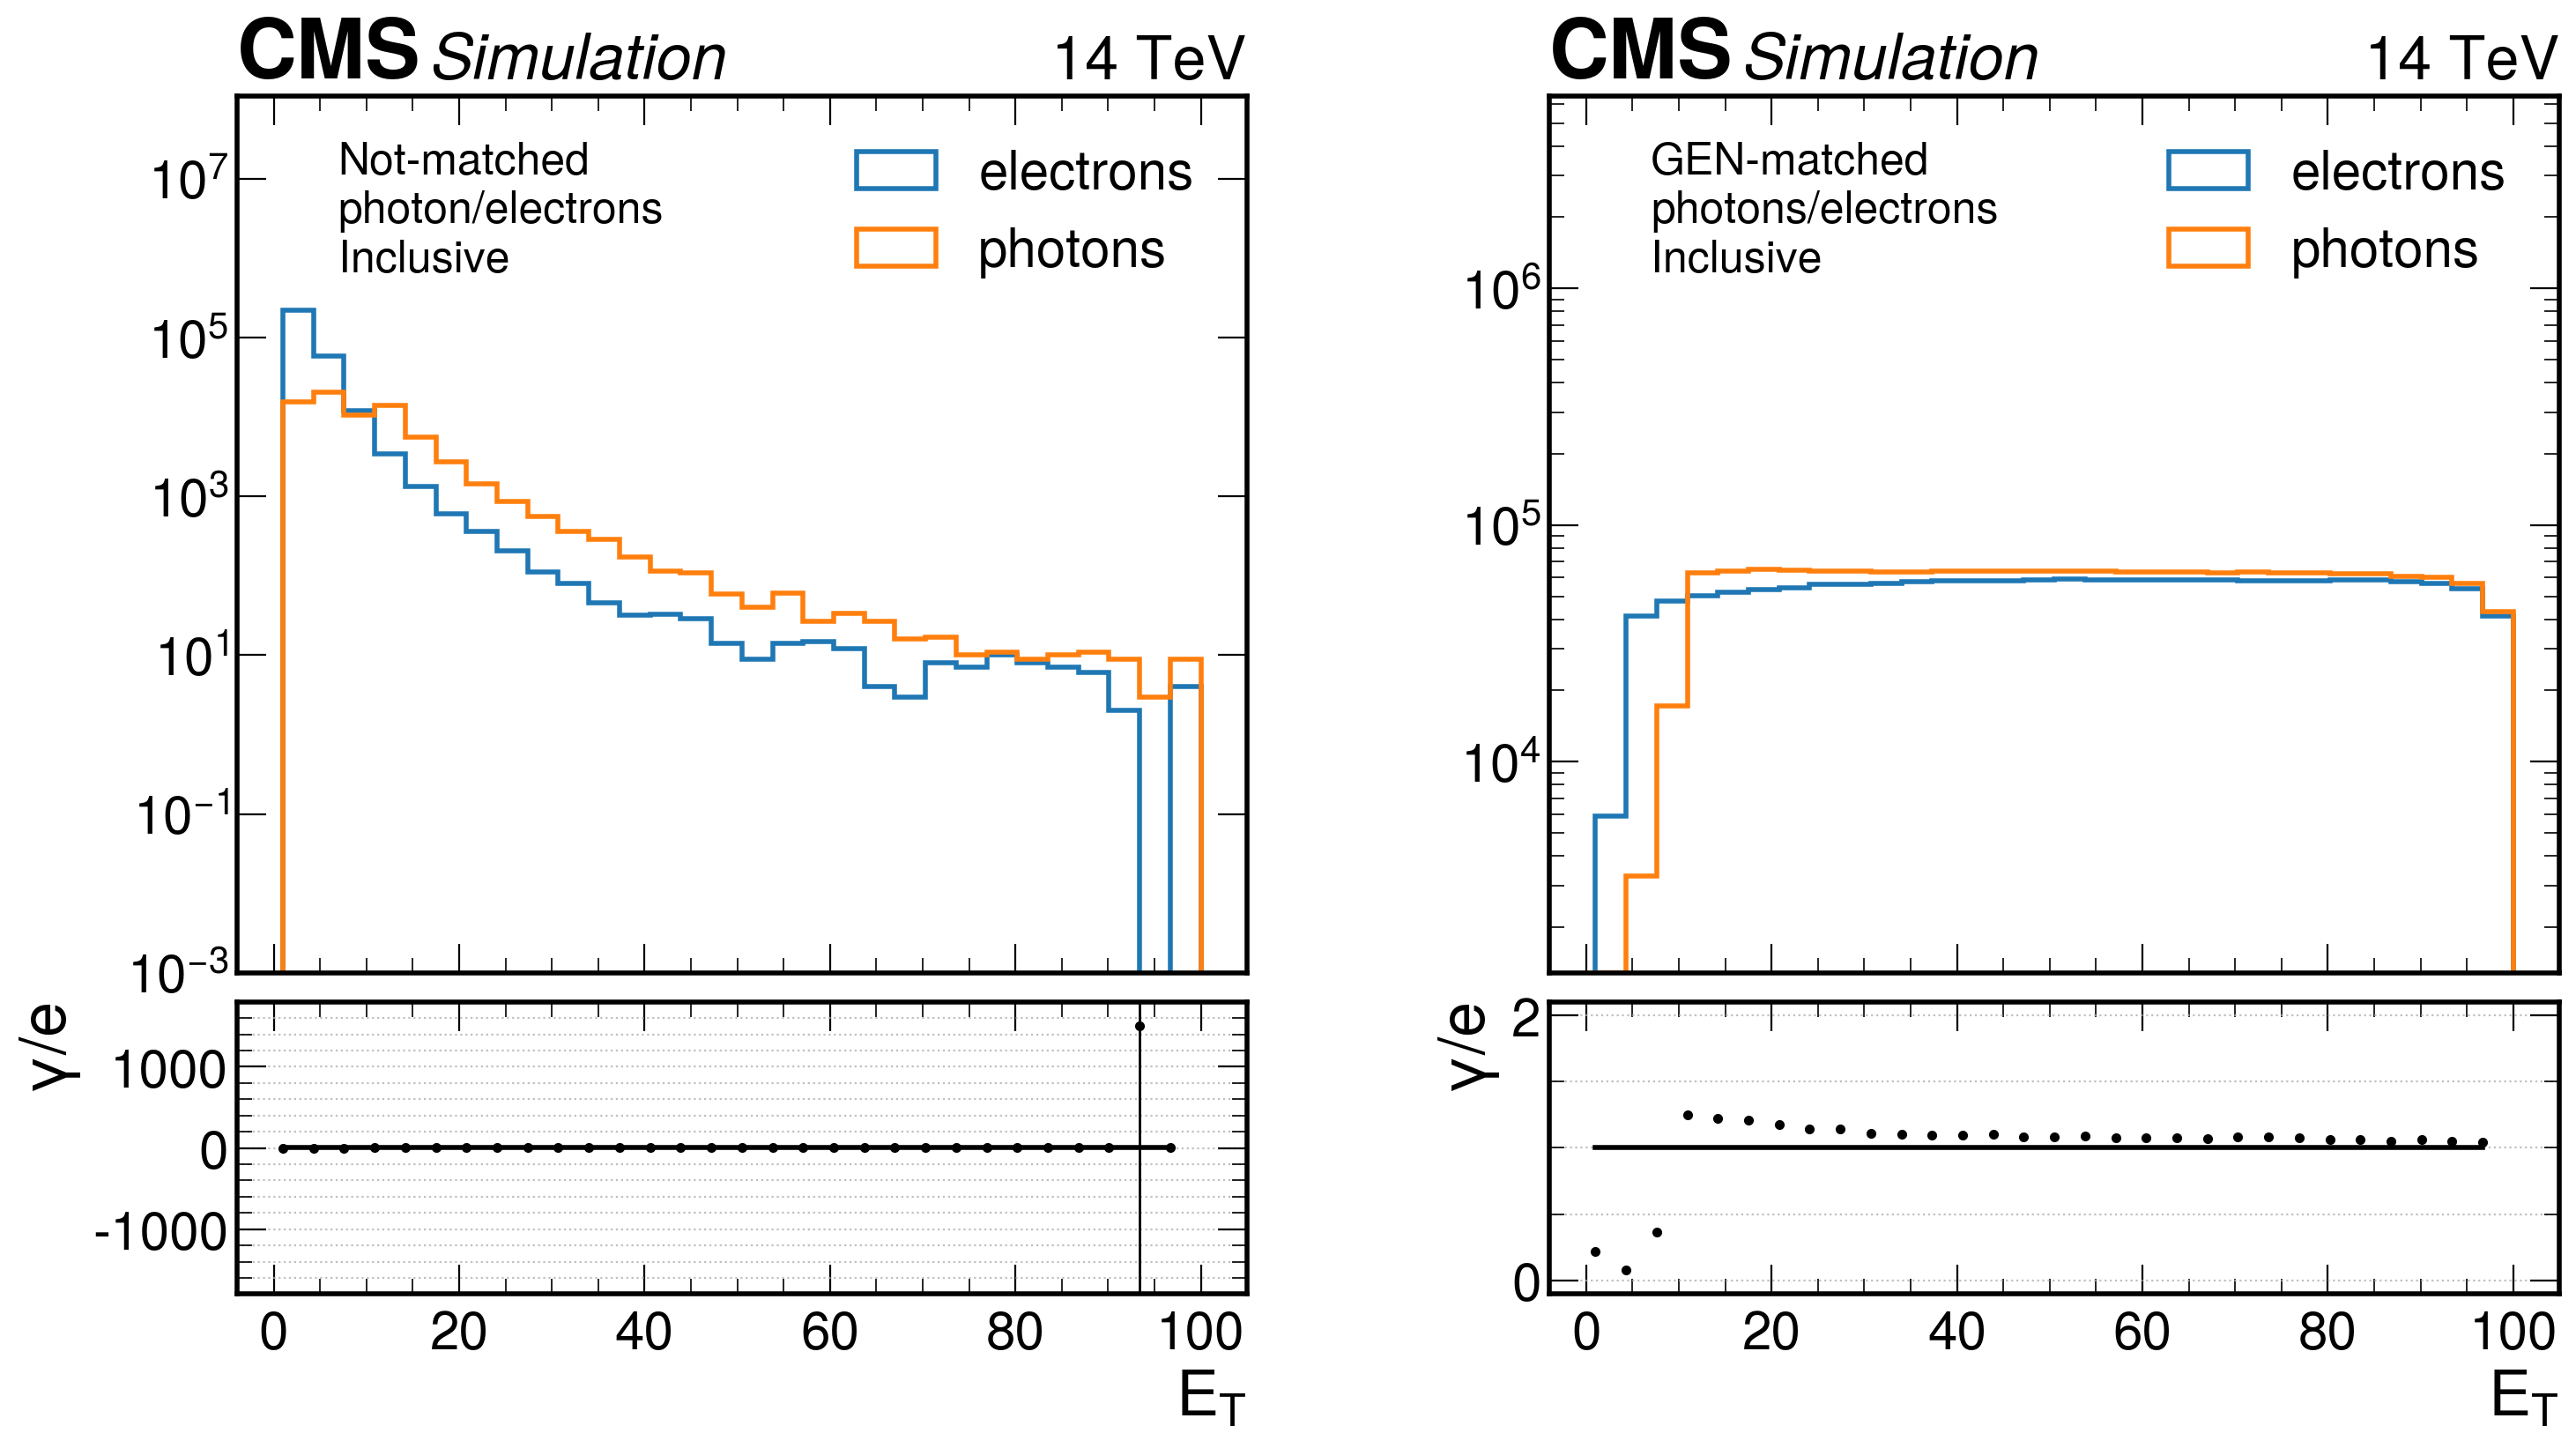

In [12]:
plot_distribution("pho_et", "ele_et", "$E_T$", 30, (1,100), output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="Inclusive")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
1
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


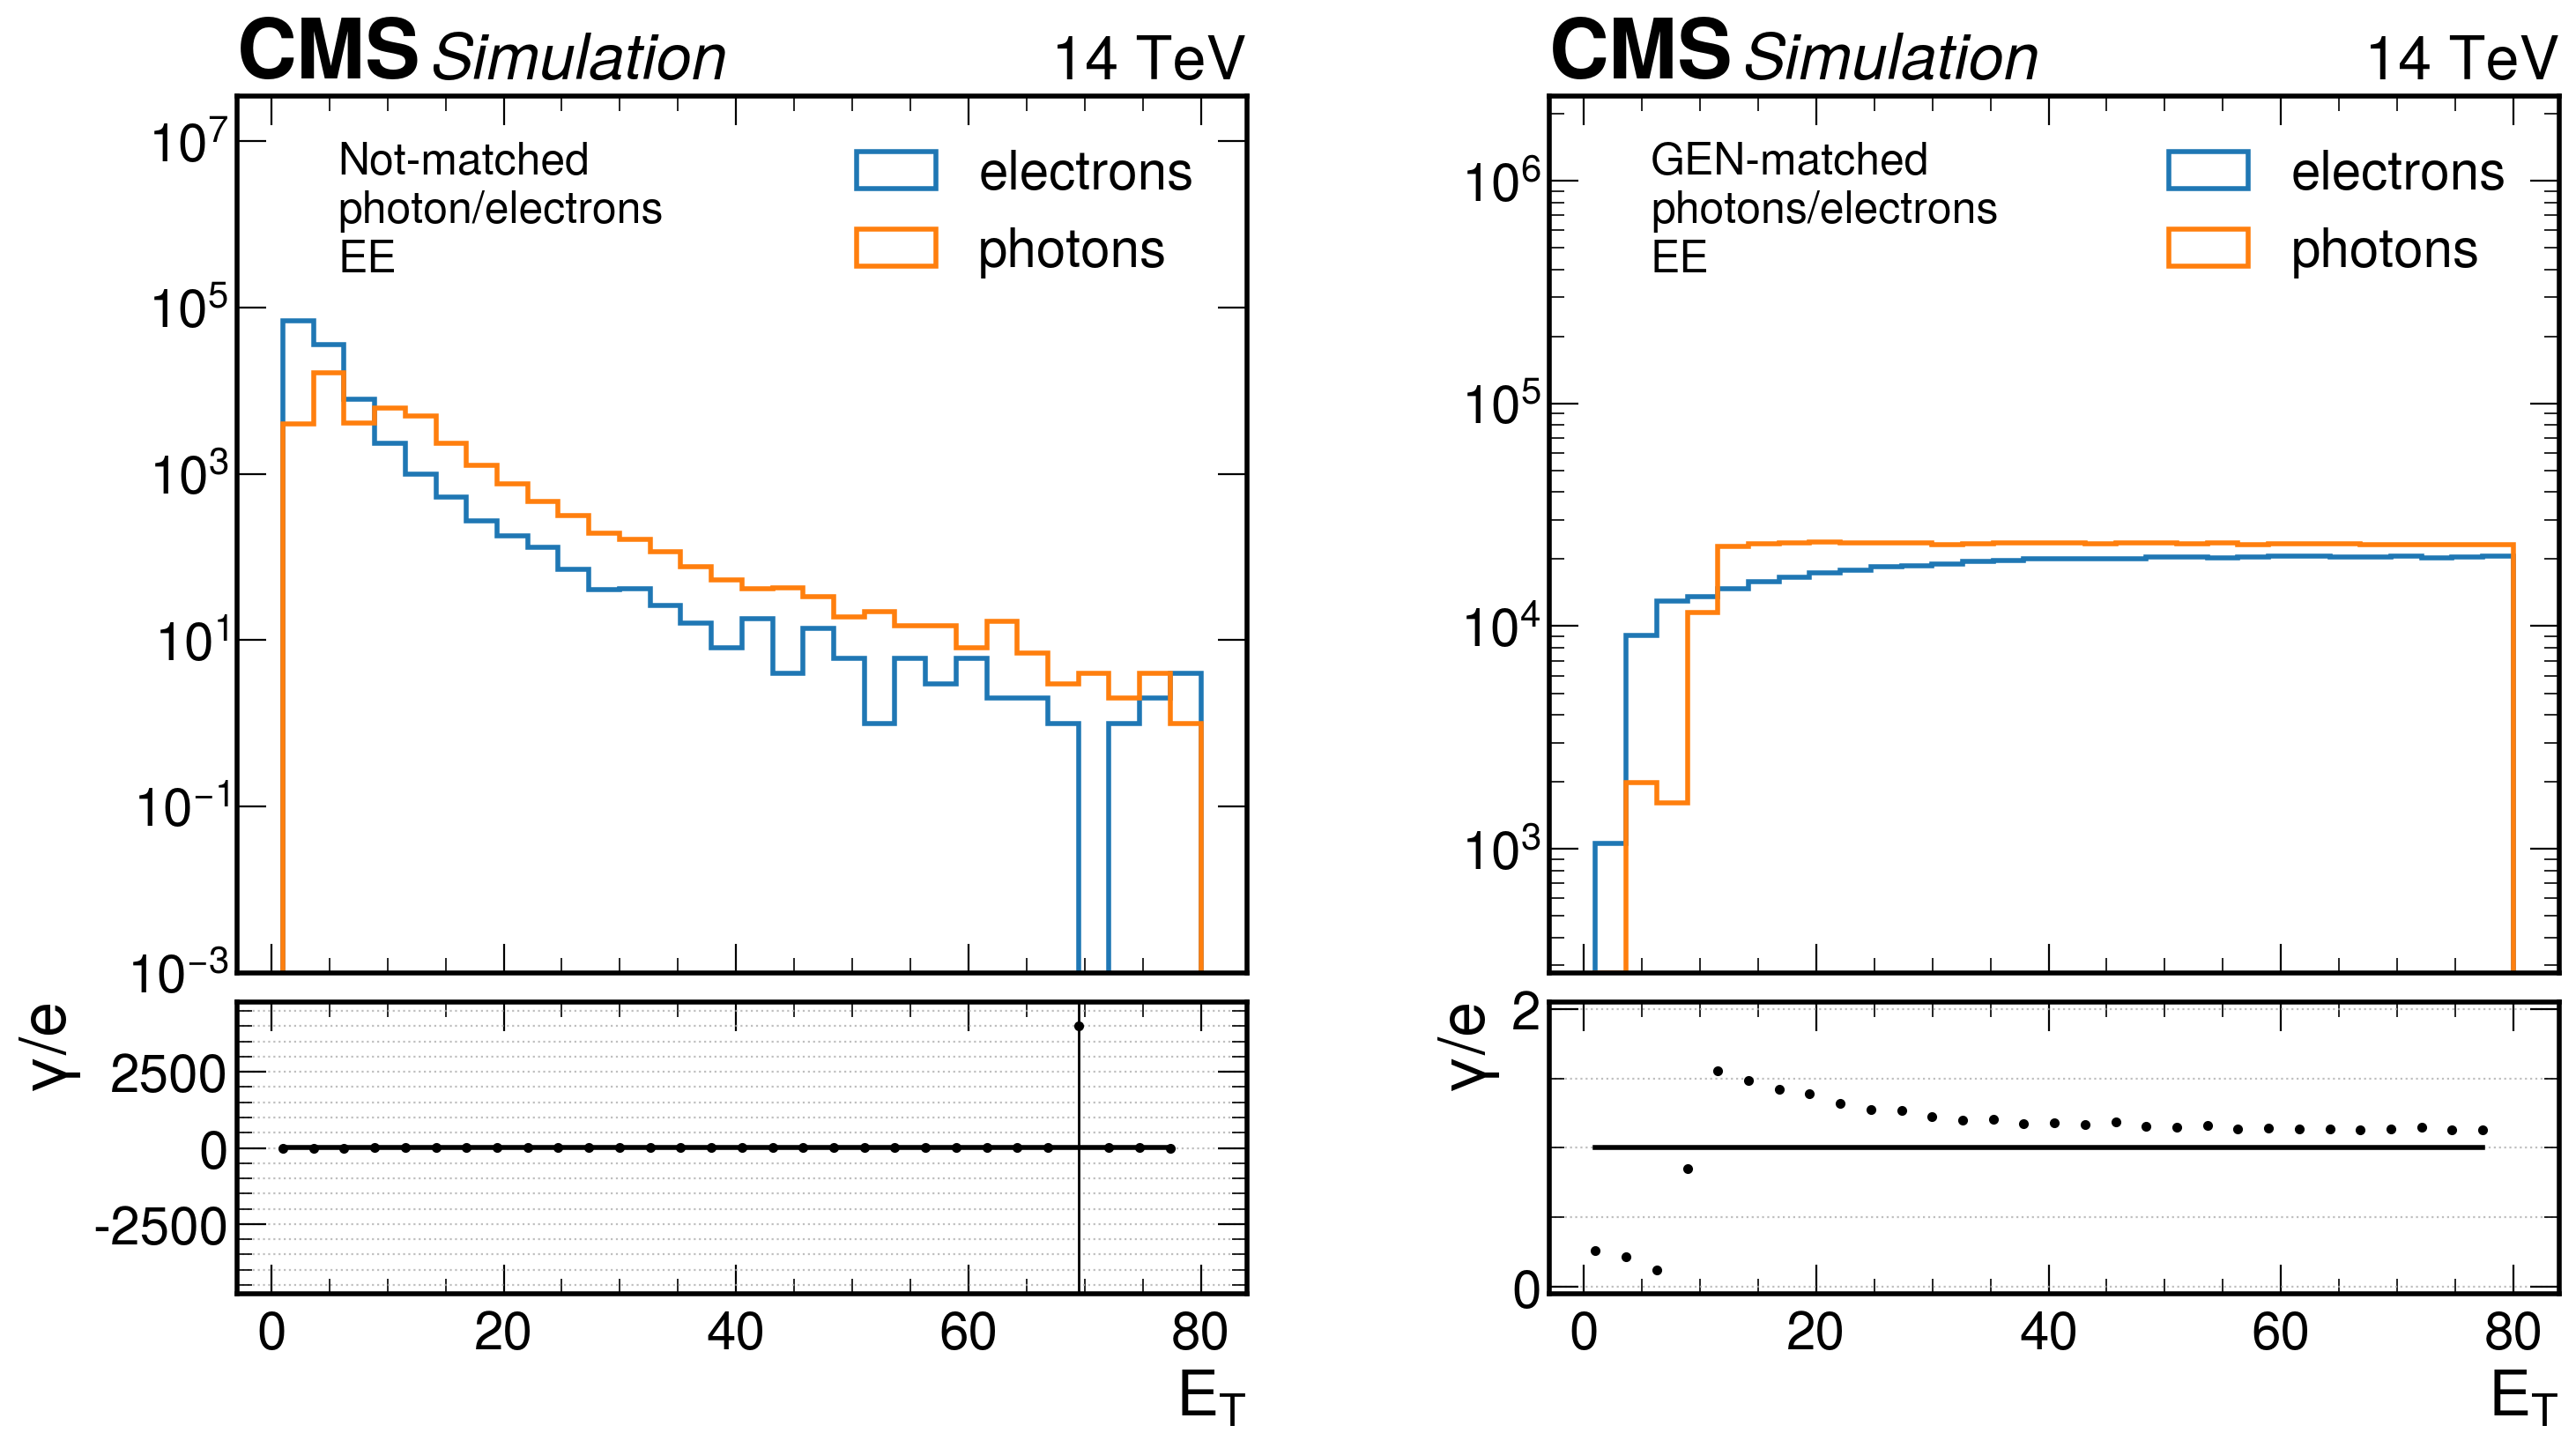

In [13]:
plot_distribution("pho_et", "ele_et", "$E_T$", 30, (1,80), output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="EE")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


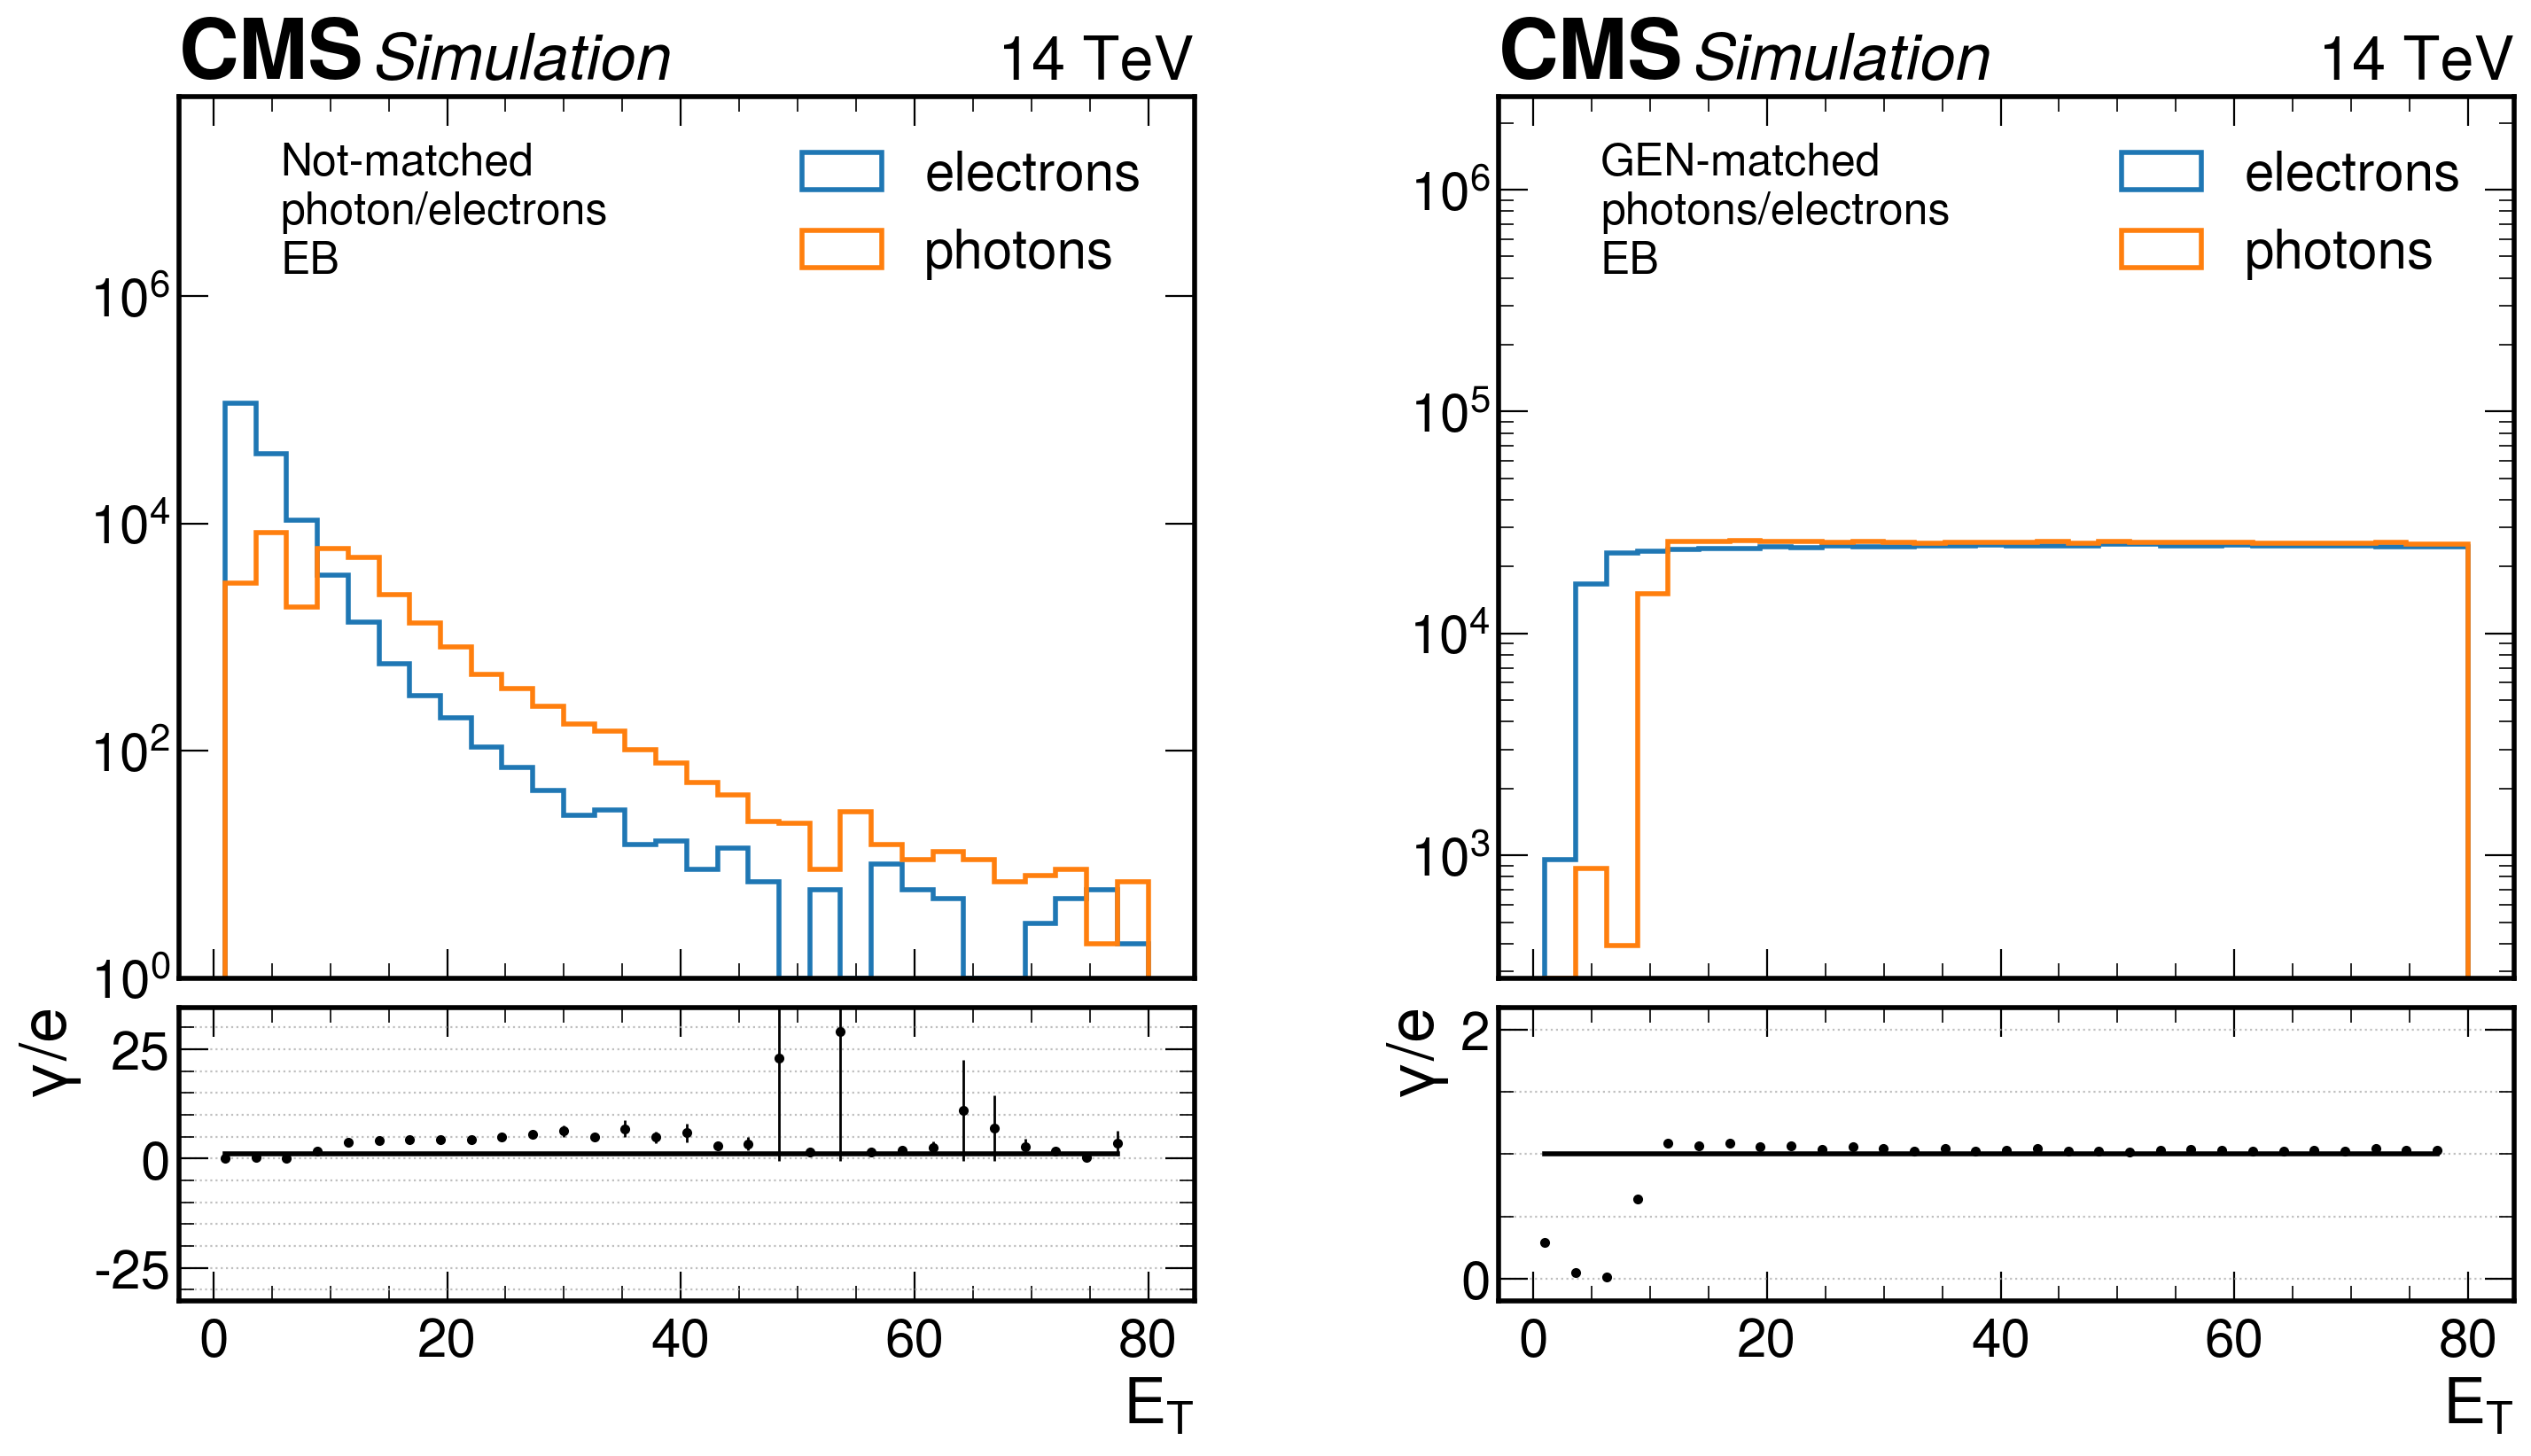

In [14]:
plot_distribution("pho_et", "ele_et", "$E_T$", 30, (1,80), output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="EB")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
2
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


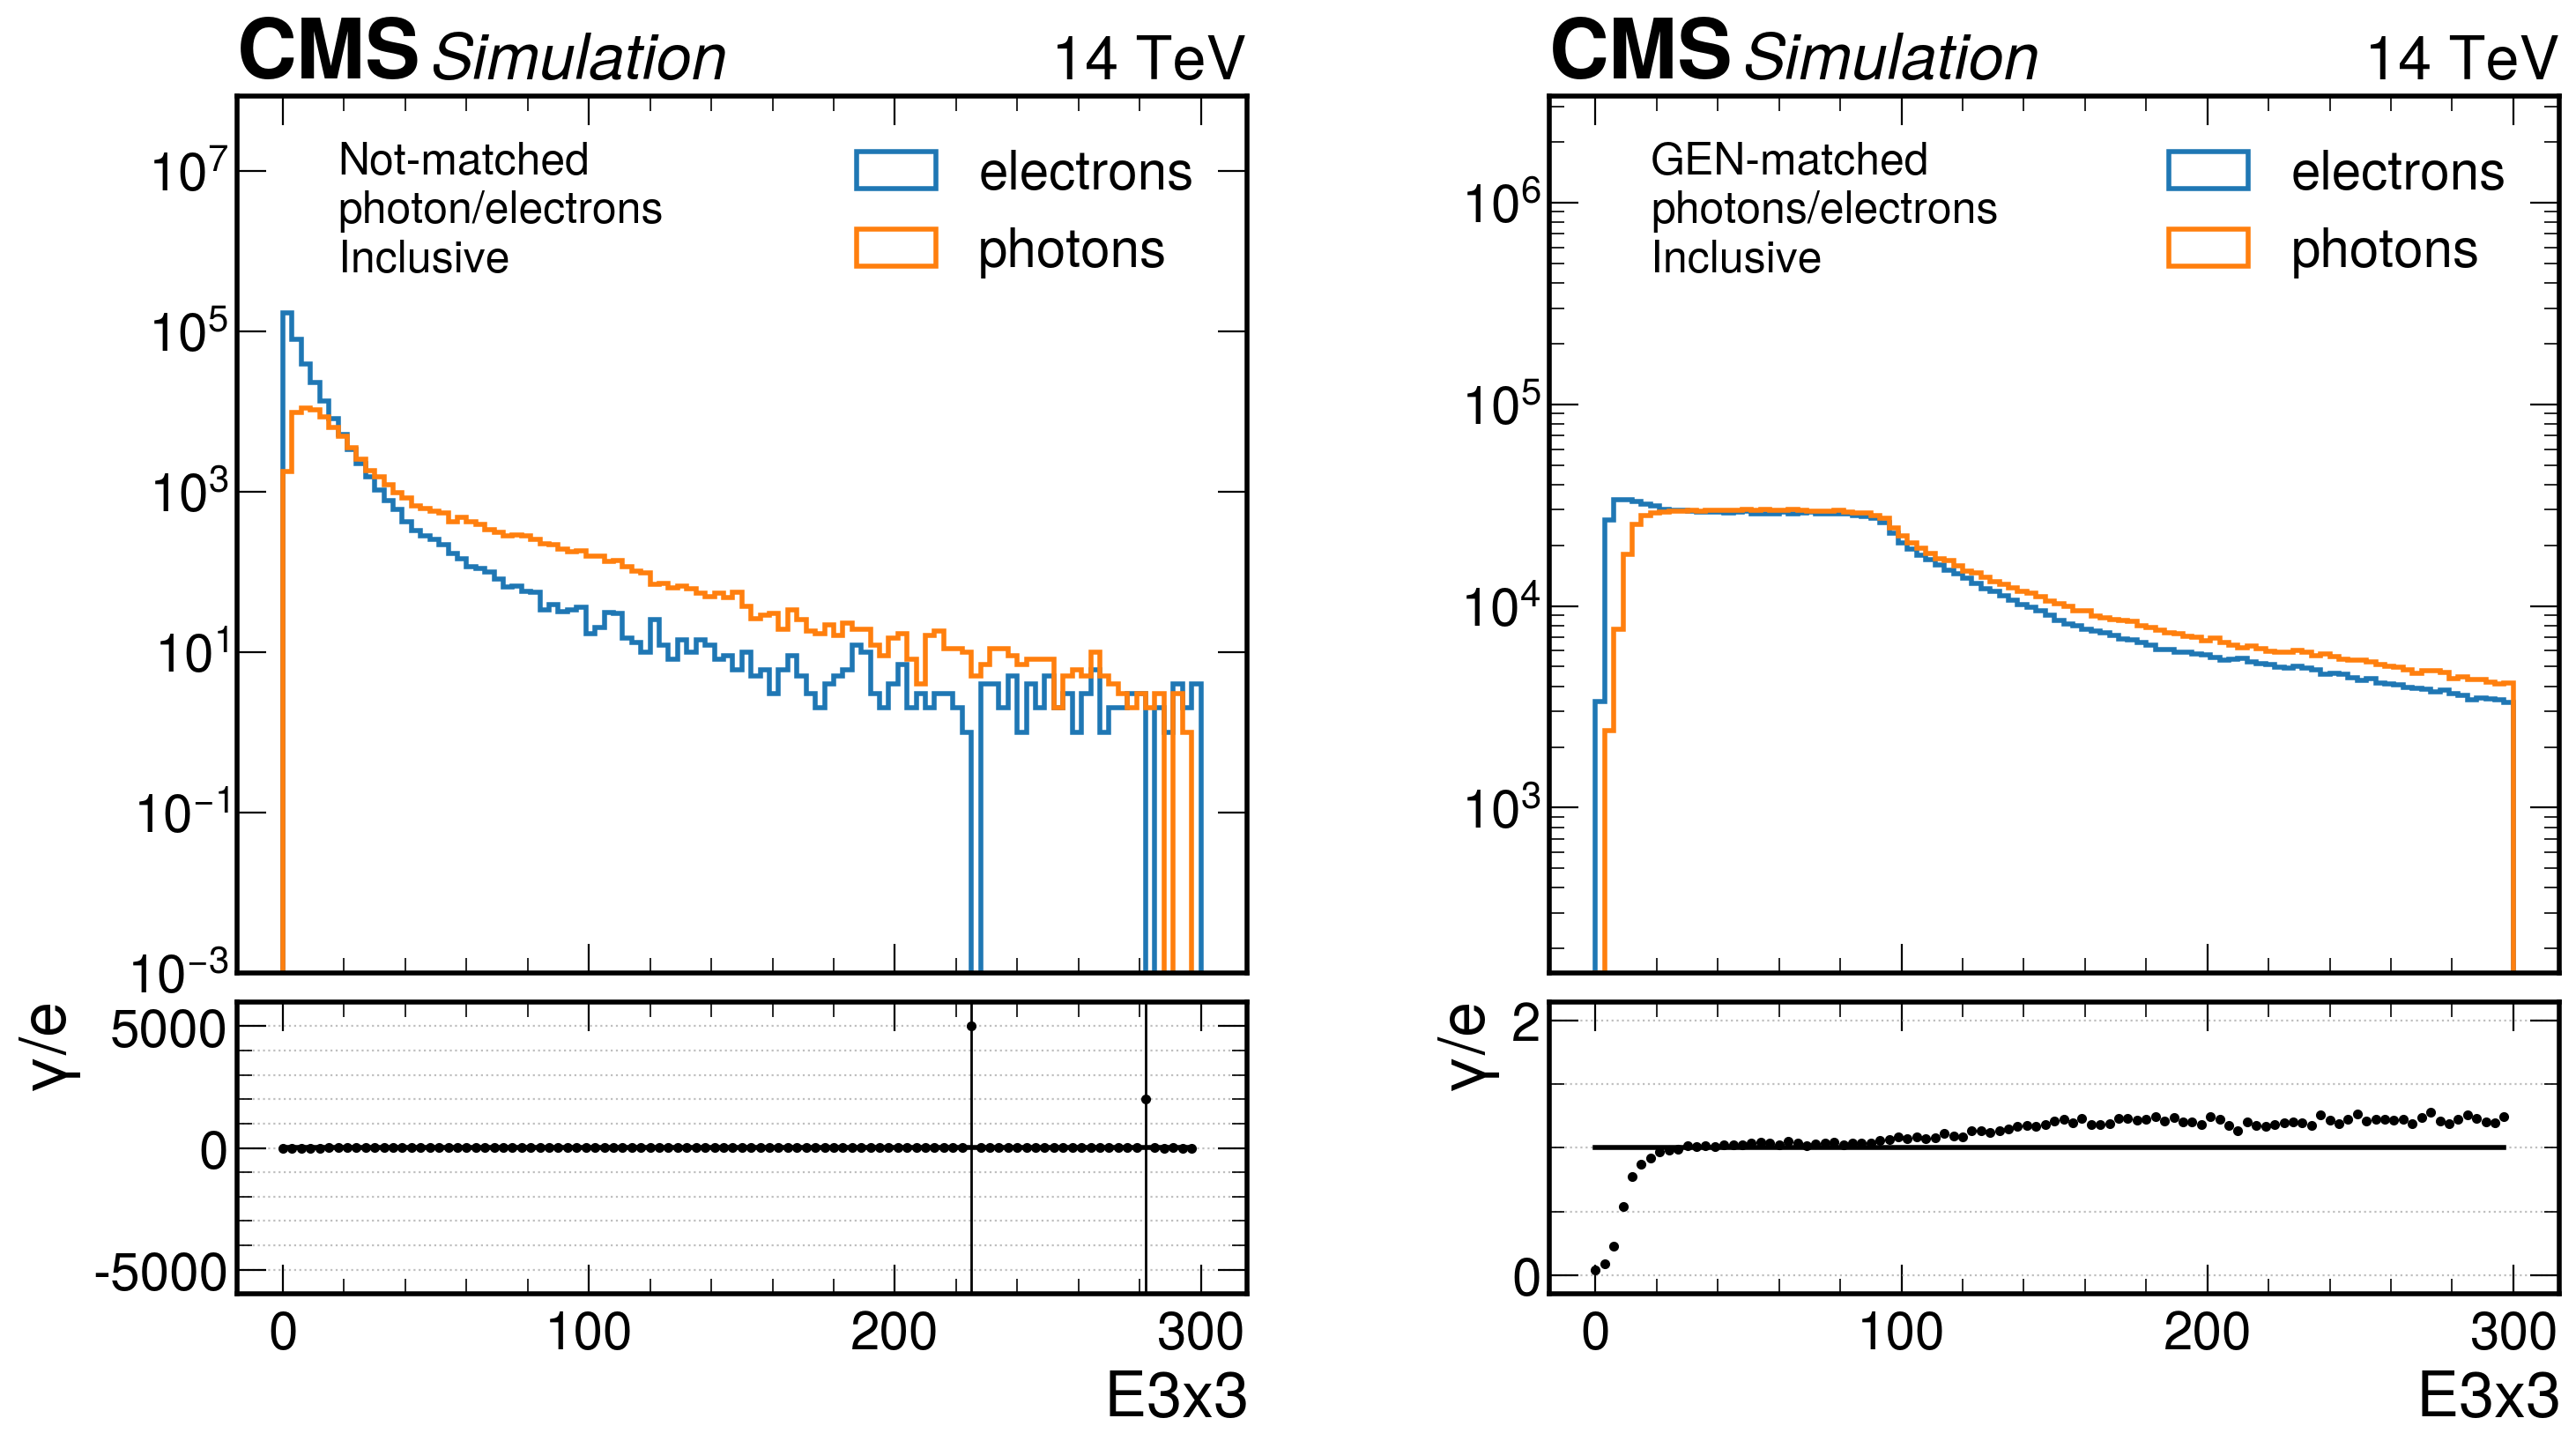

In [15]:
plot_distribution("pho_e3x3", "ele_e3x3", "$E3x3$", 100, (0,300), output_folder+"/basic_distribution_comparison", ylog=True)

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


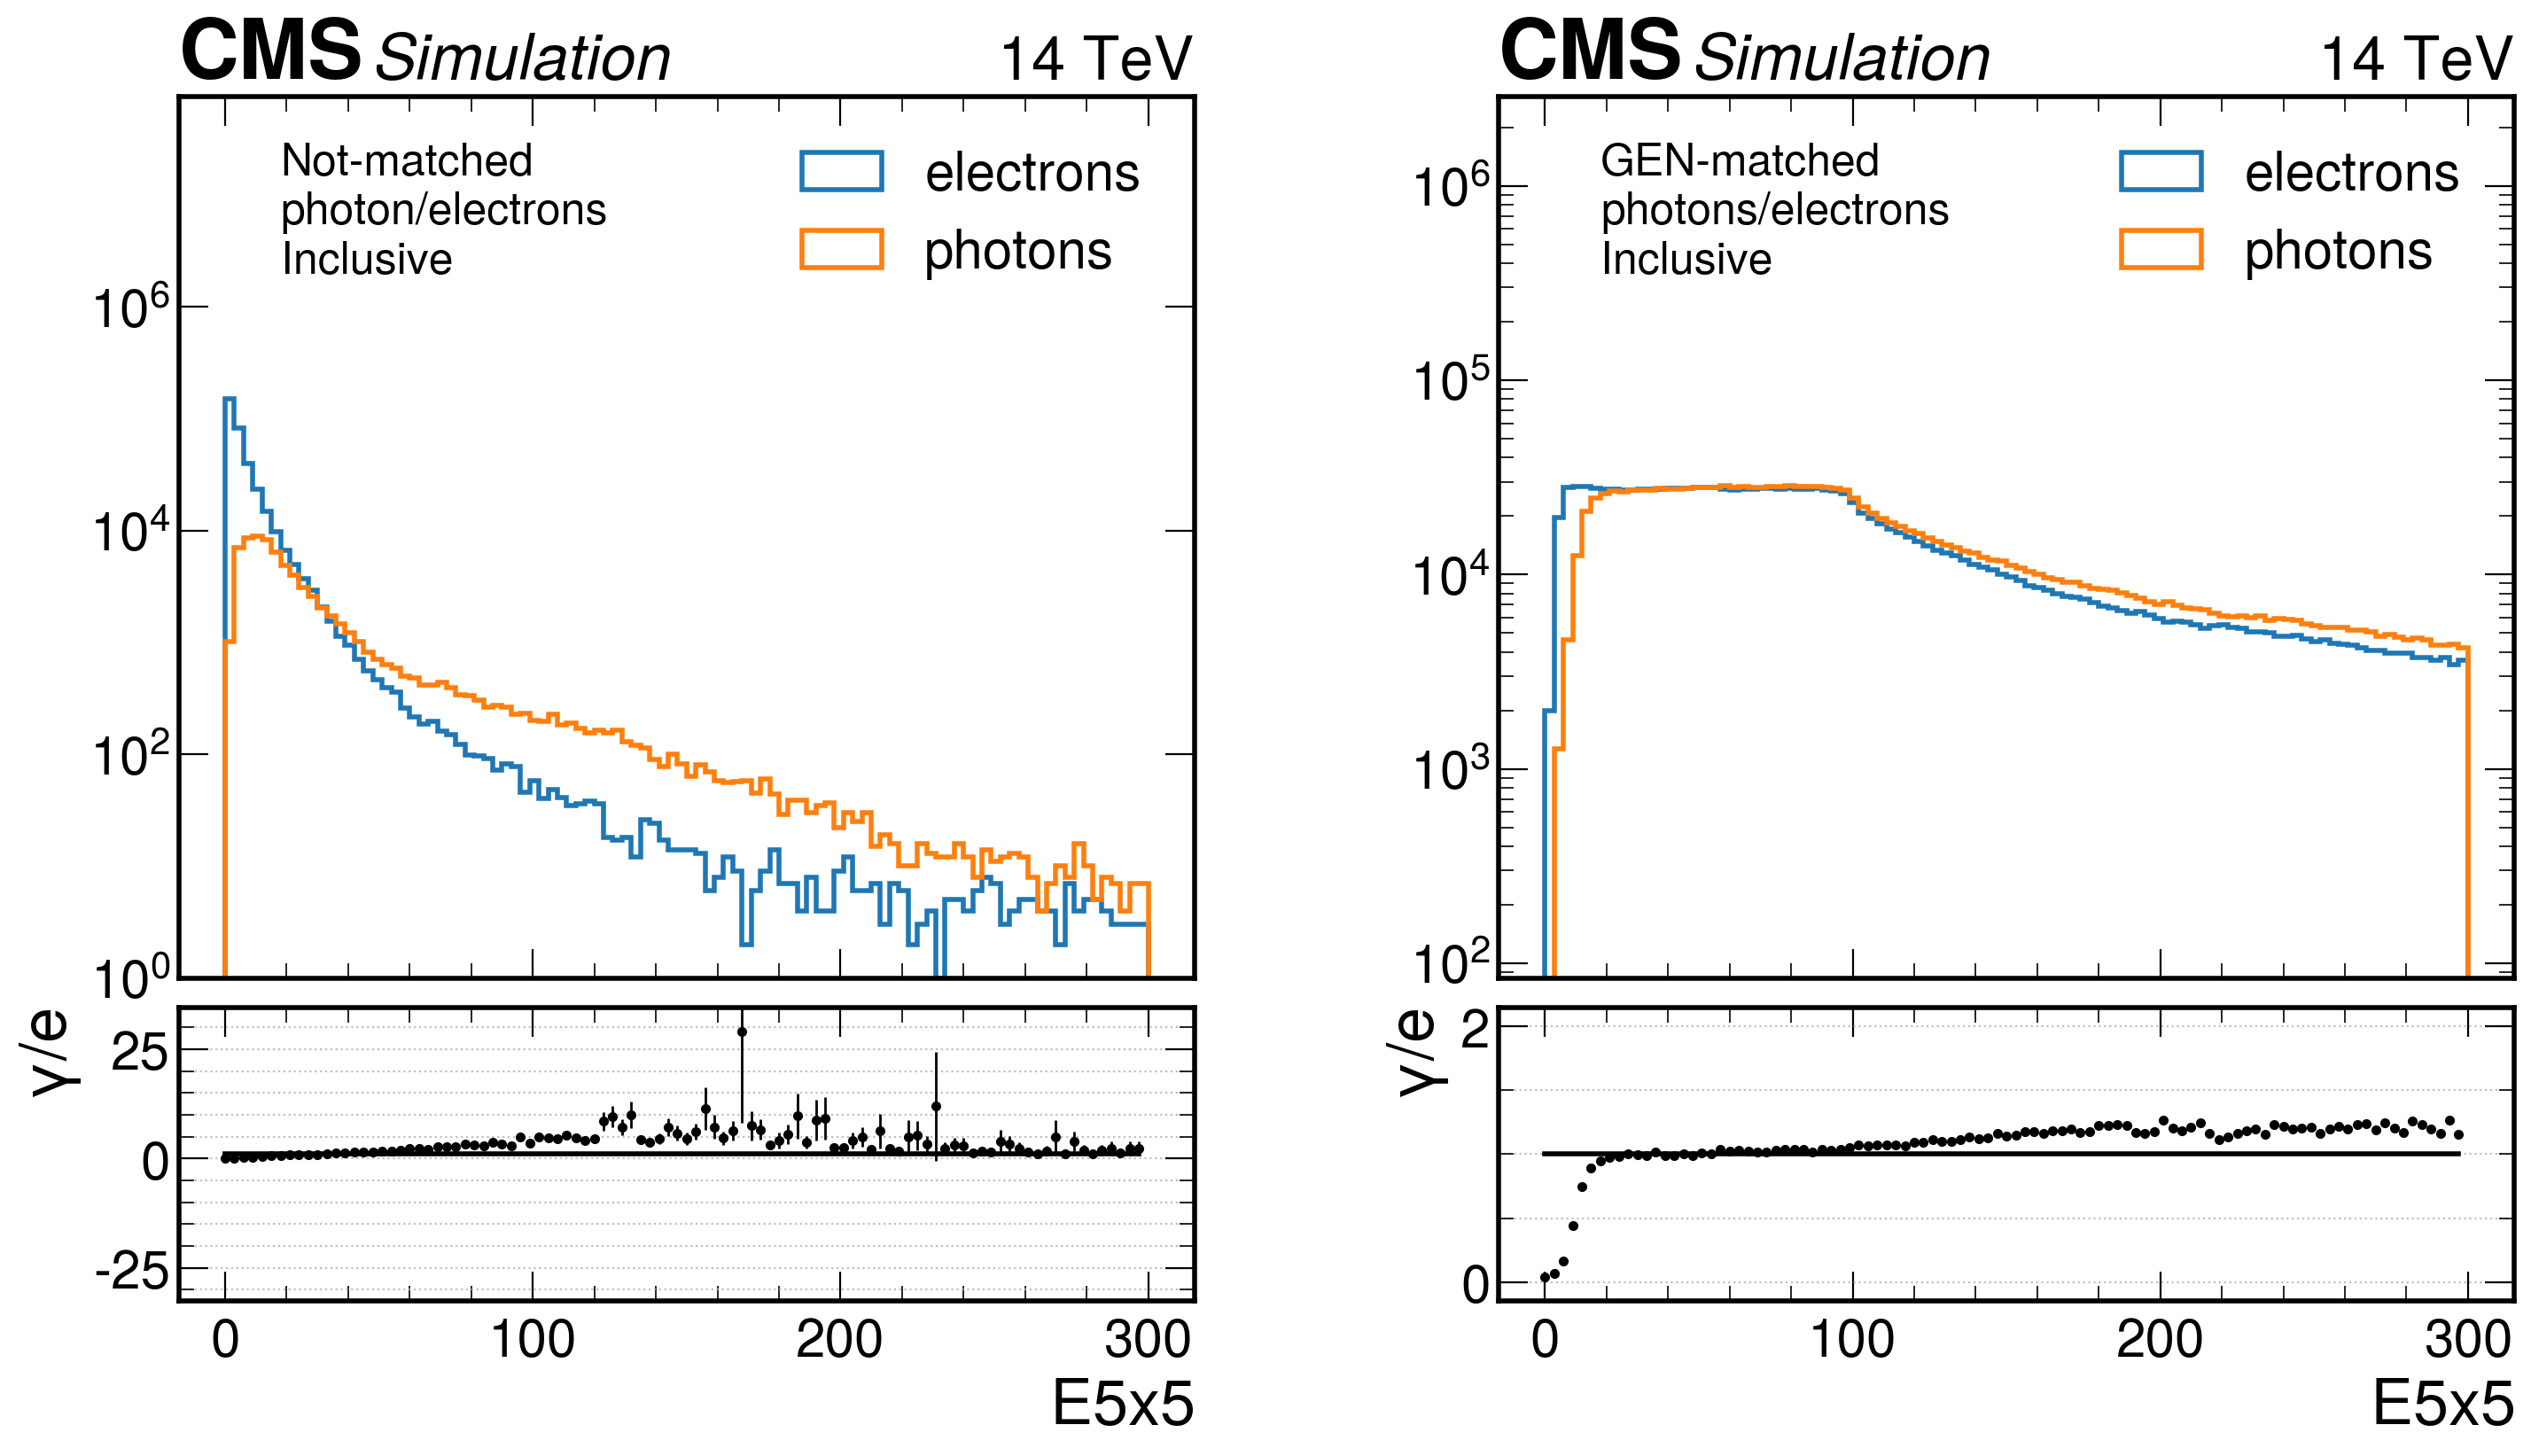

In [16]:
plot_distribution("pho_e5x5", "ele_e5x5", "$E5x5$", 100, (0,300), output_folder+"/basic_distribution_comparison", ylog=True)

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


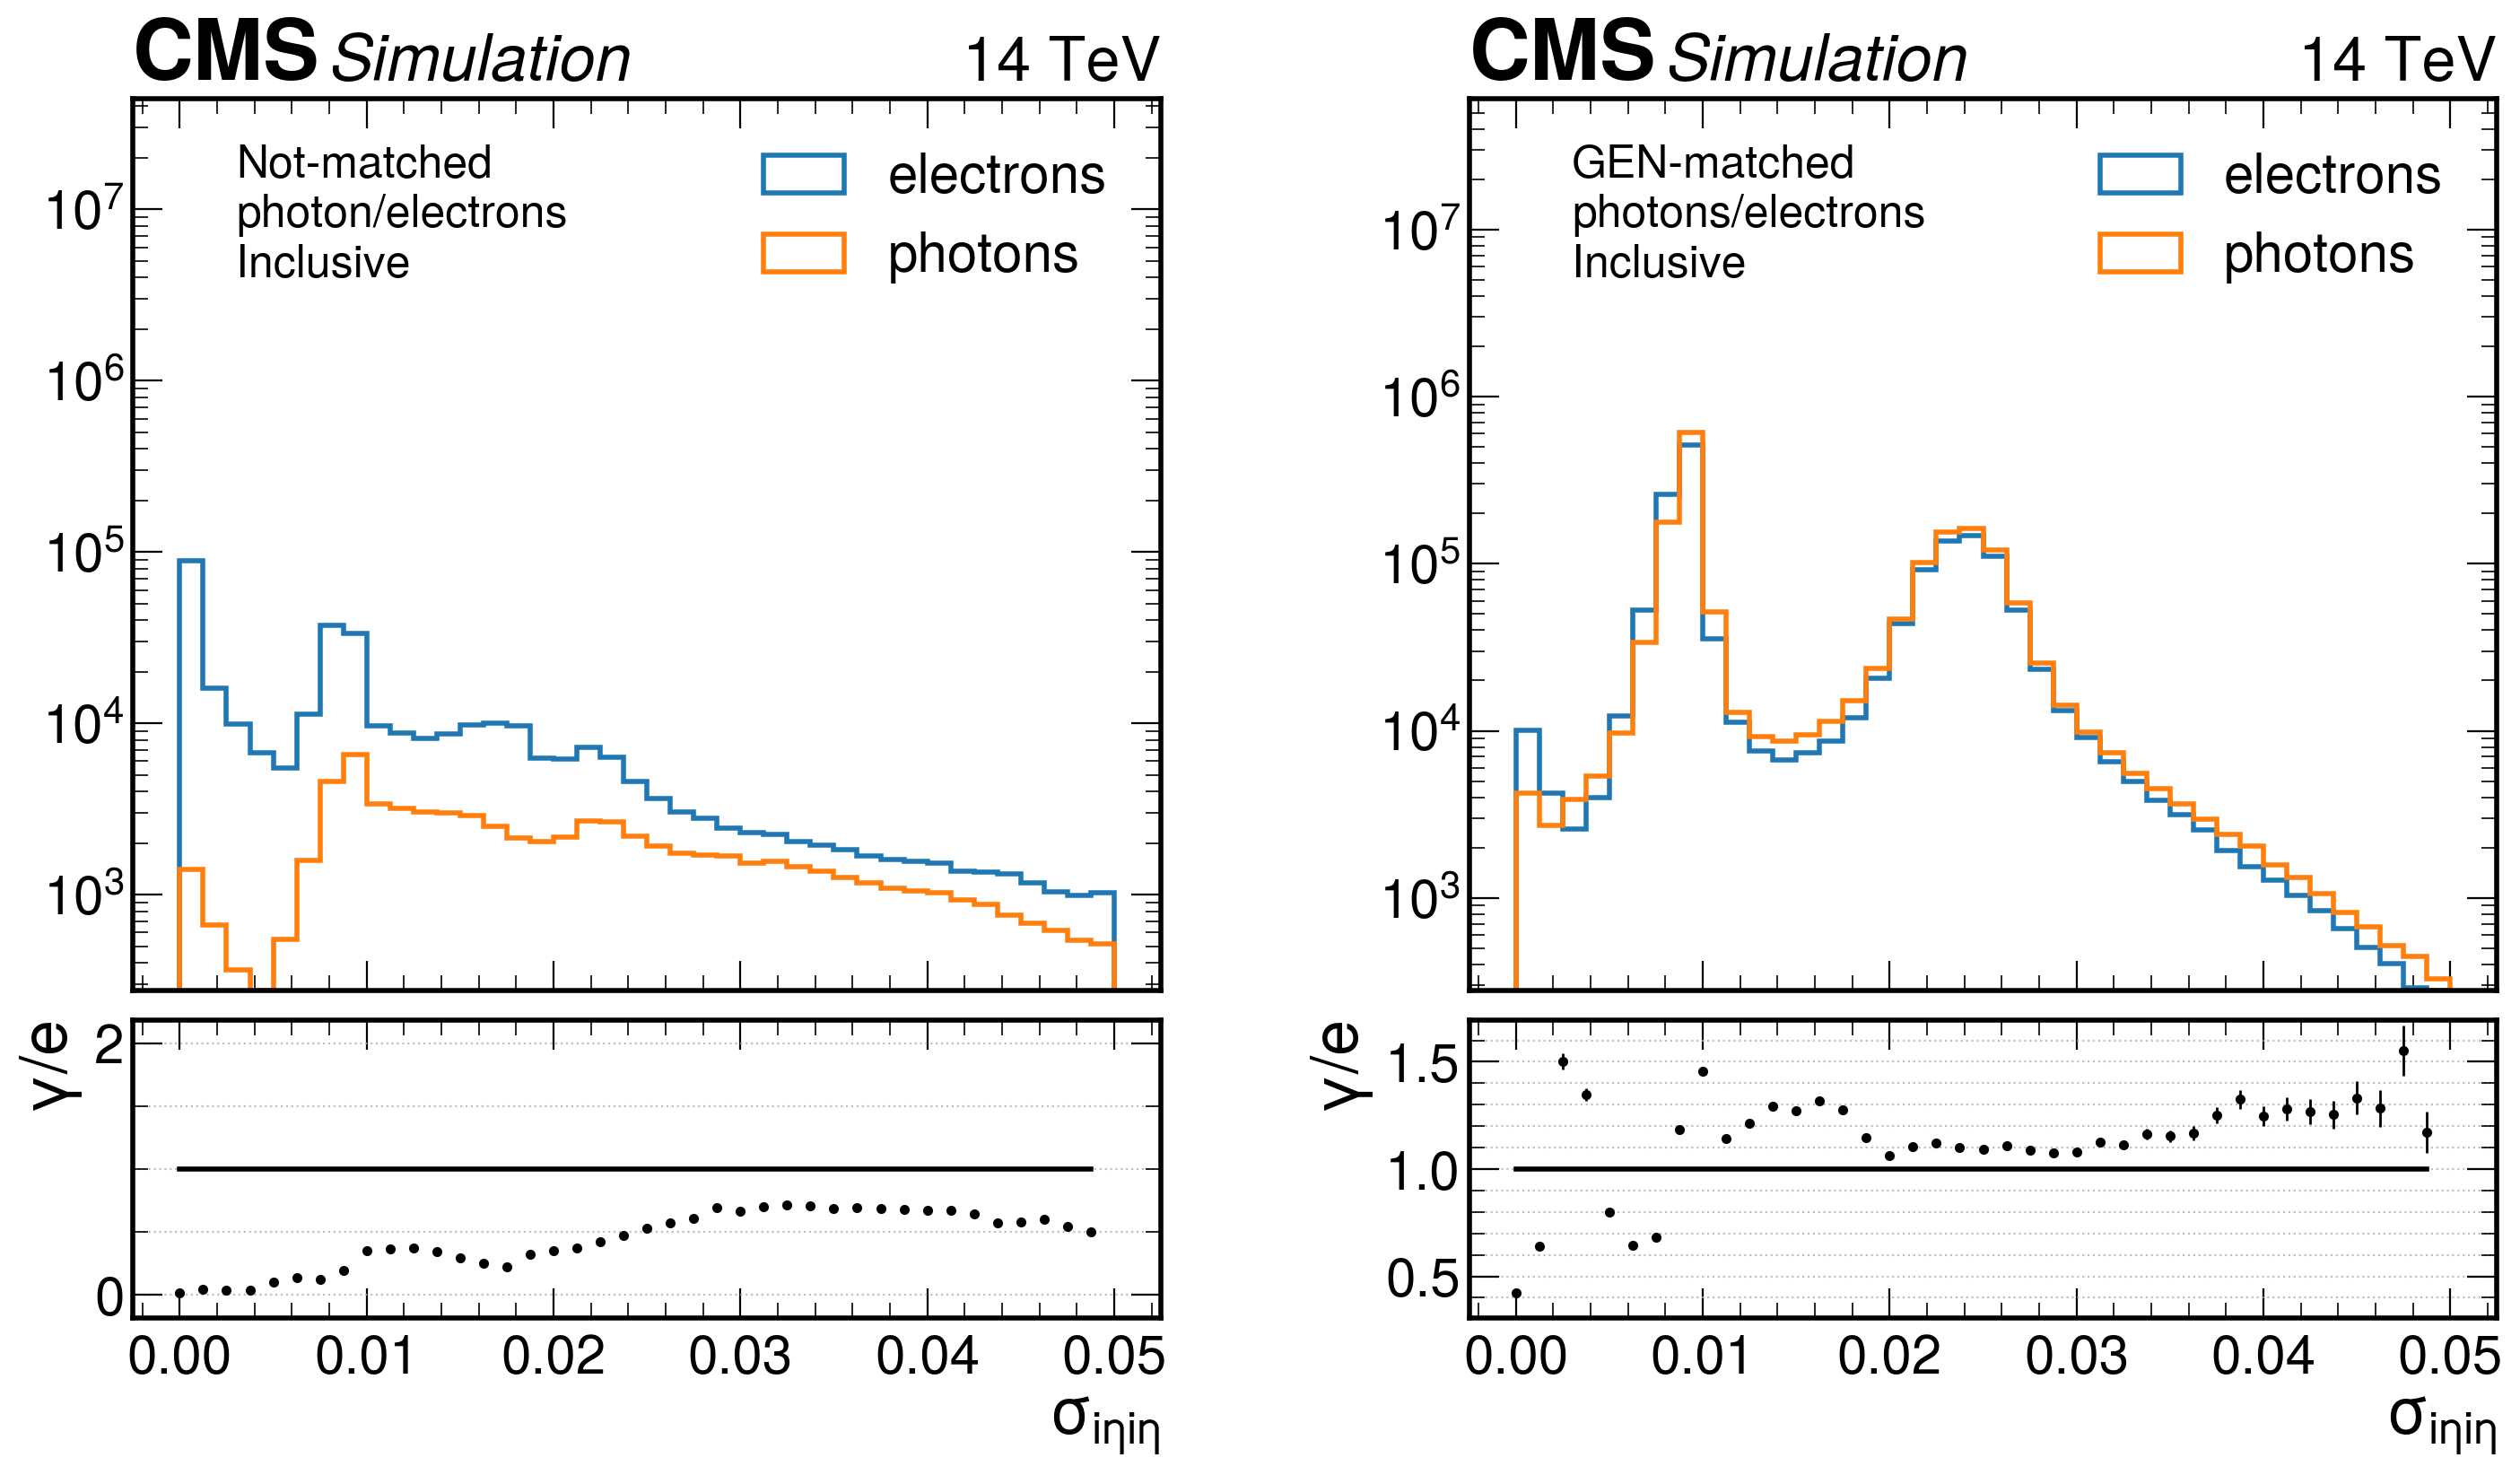

In [17]:
plot_distribution("pho_sigmaIEtaIEta", "ele_sigmaIEtaIEta", "$\sigma_{i\eta i\eta}$", 40, (0,0.05), output_folder+"/basic_distribution_comparison", ylog=True)

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


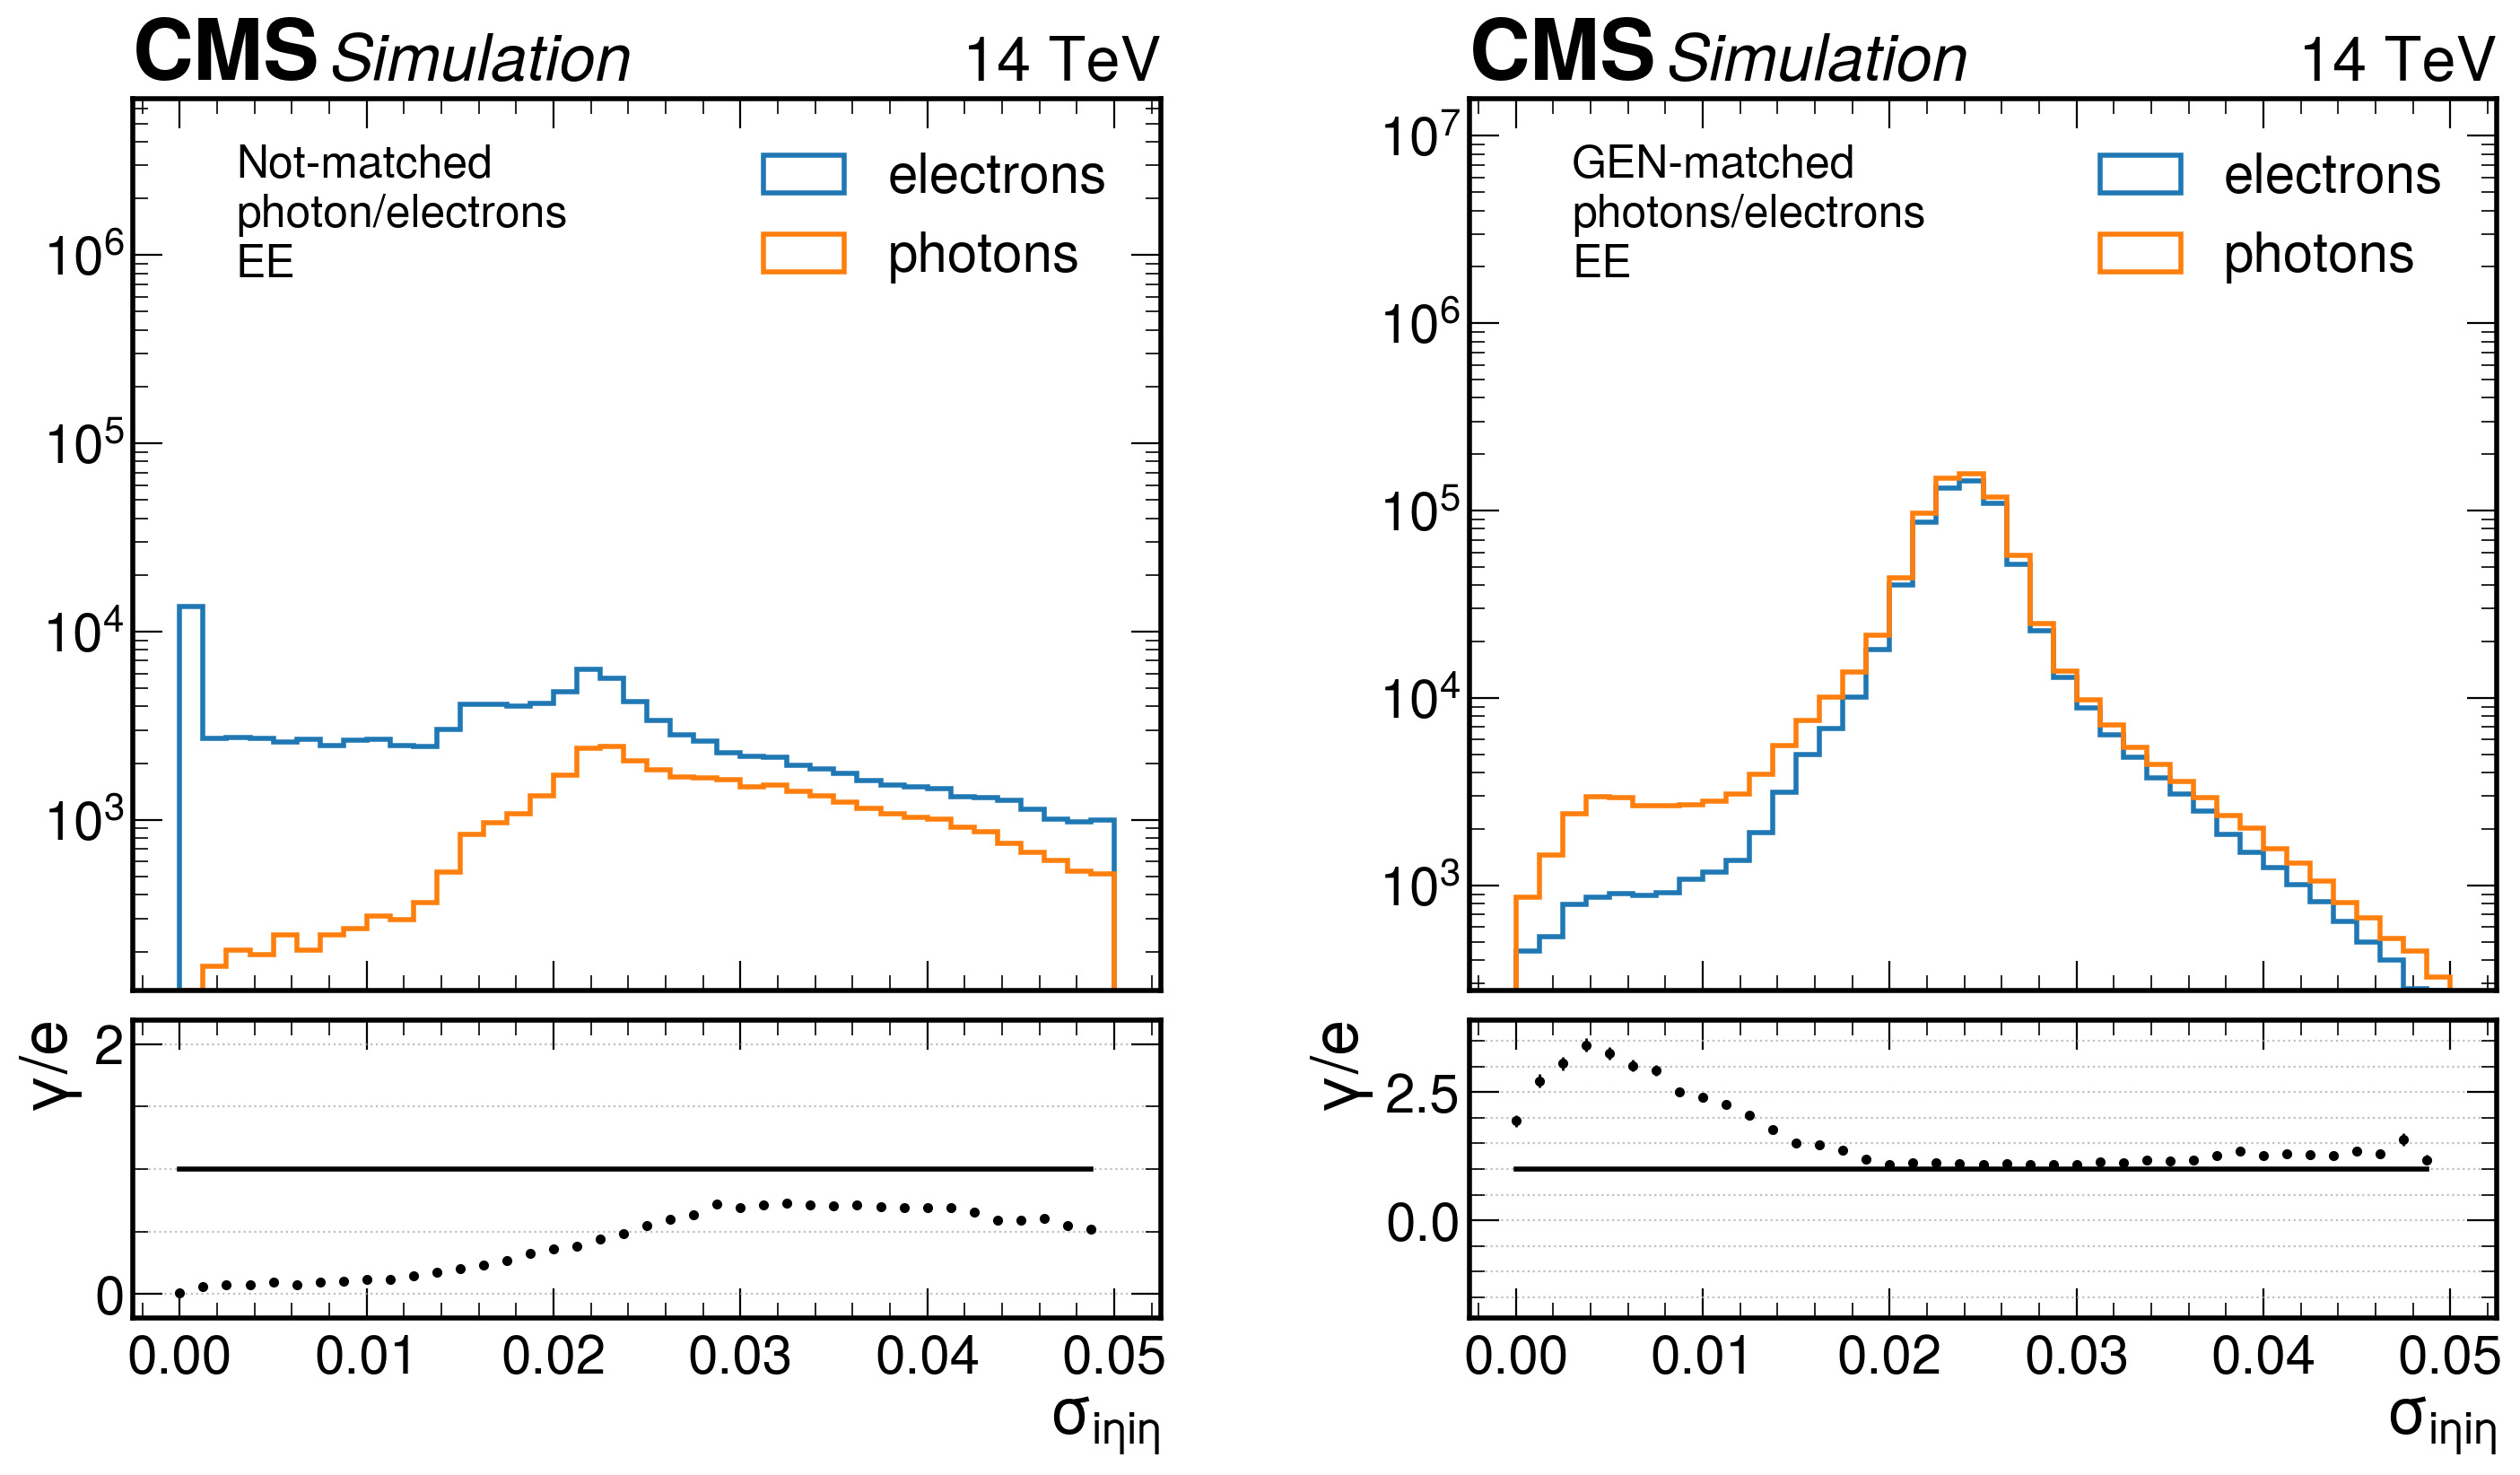

In [18]:
plot_distribution("pho_sigmaIEtaIEta", "ele_sigmaIEtaIEta", "$\sigma_{i\eta i\eta}$", 40, (0,0.05), 
                  output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="EE")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


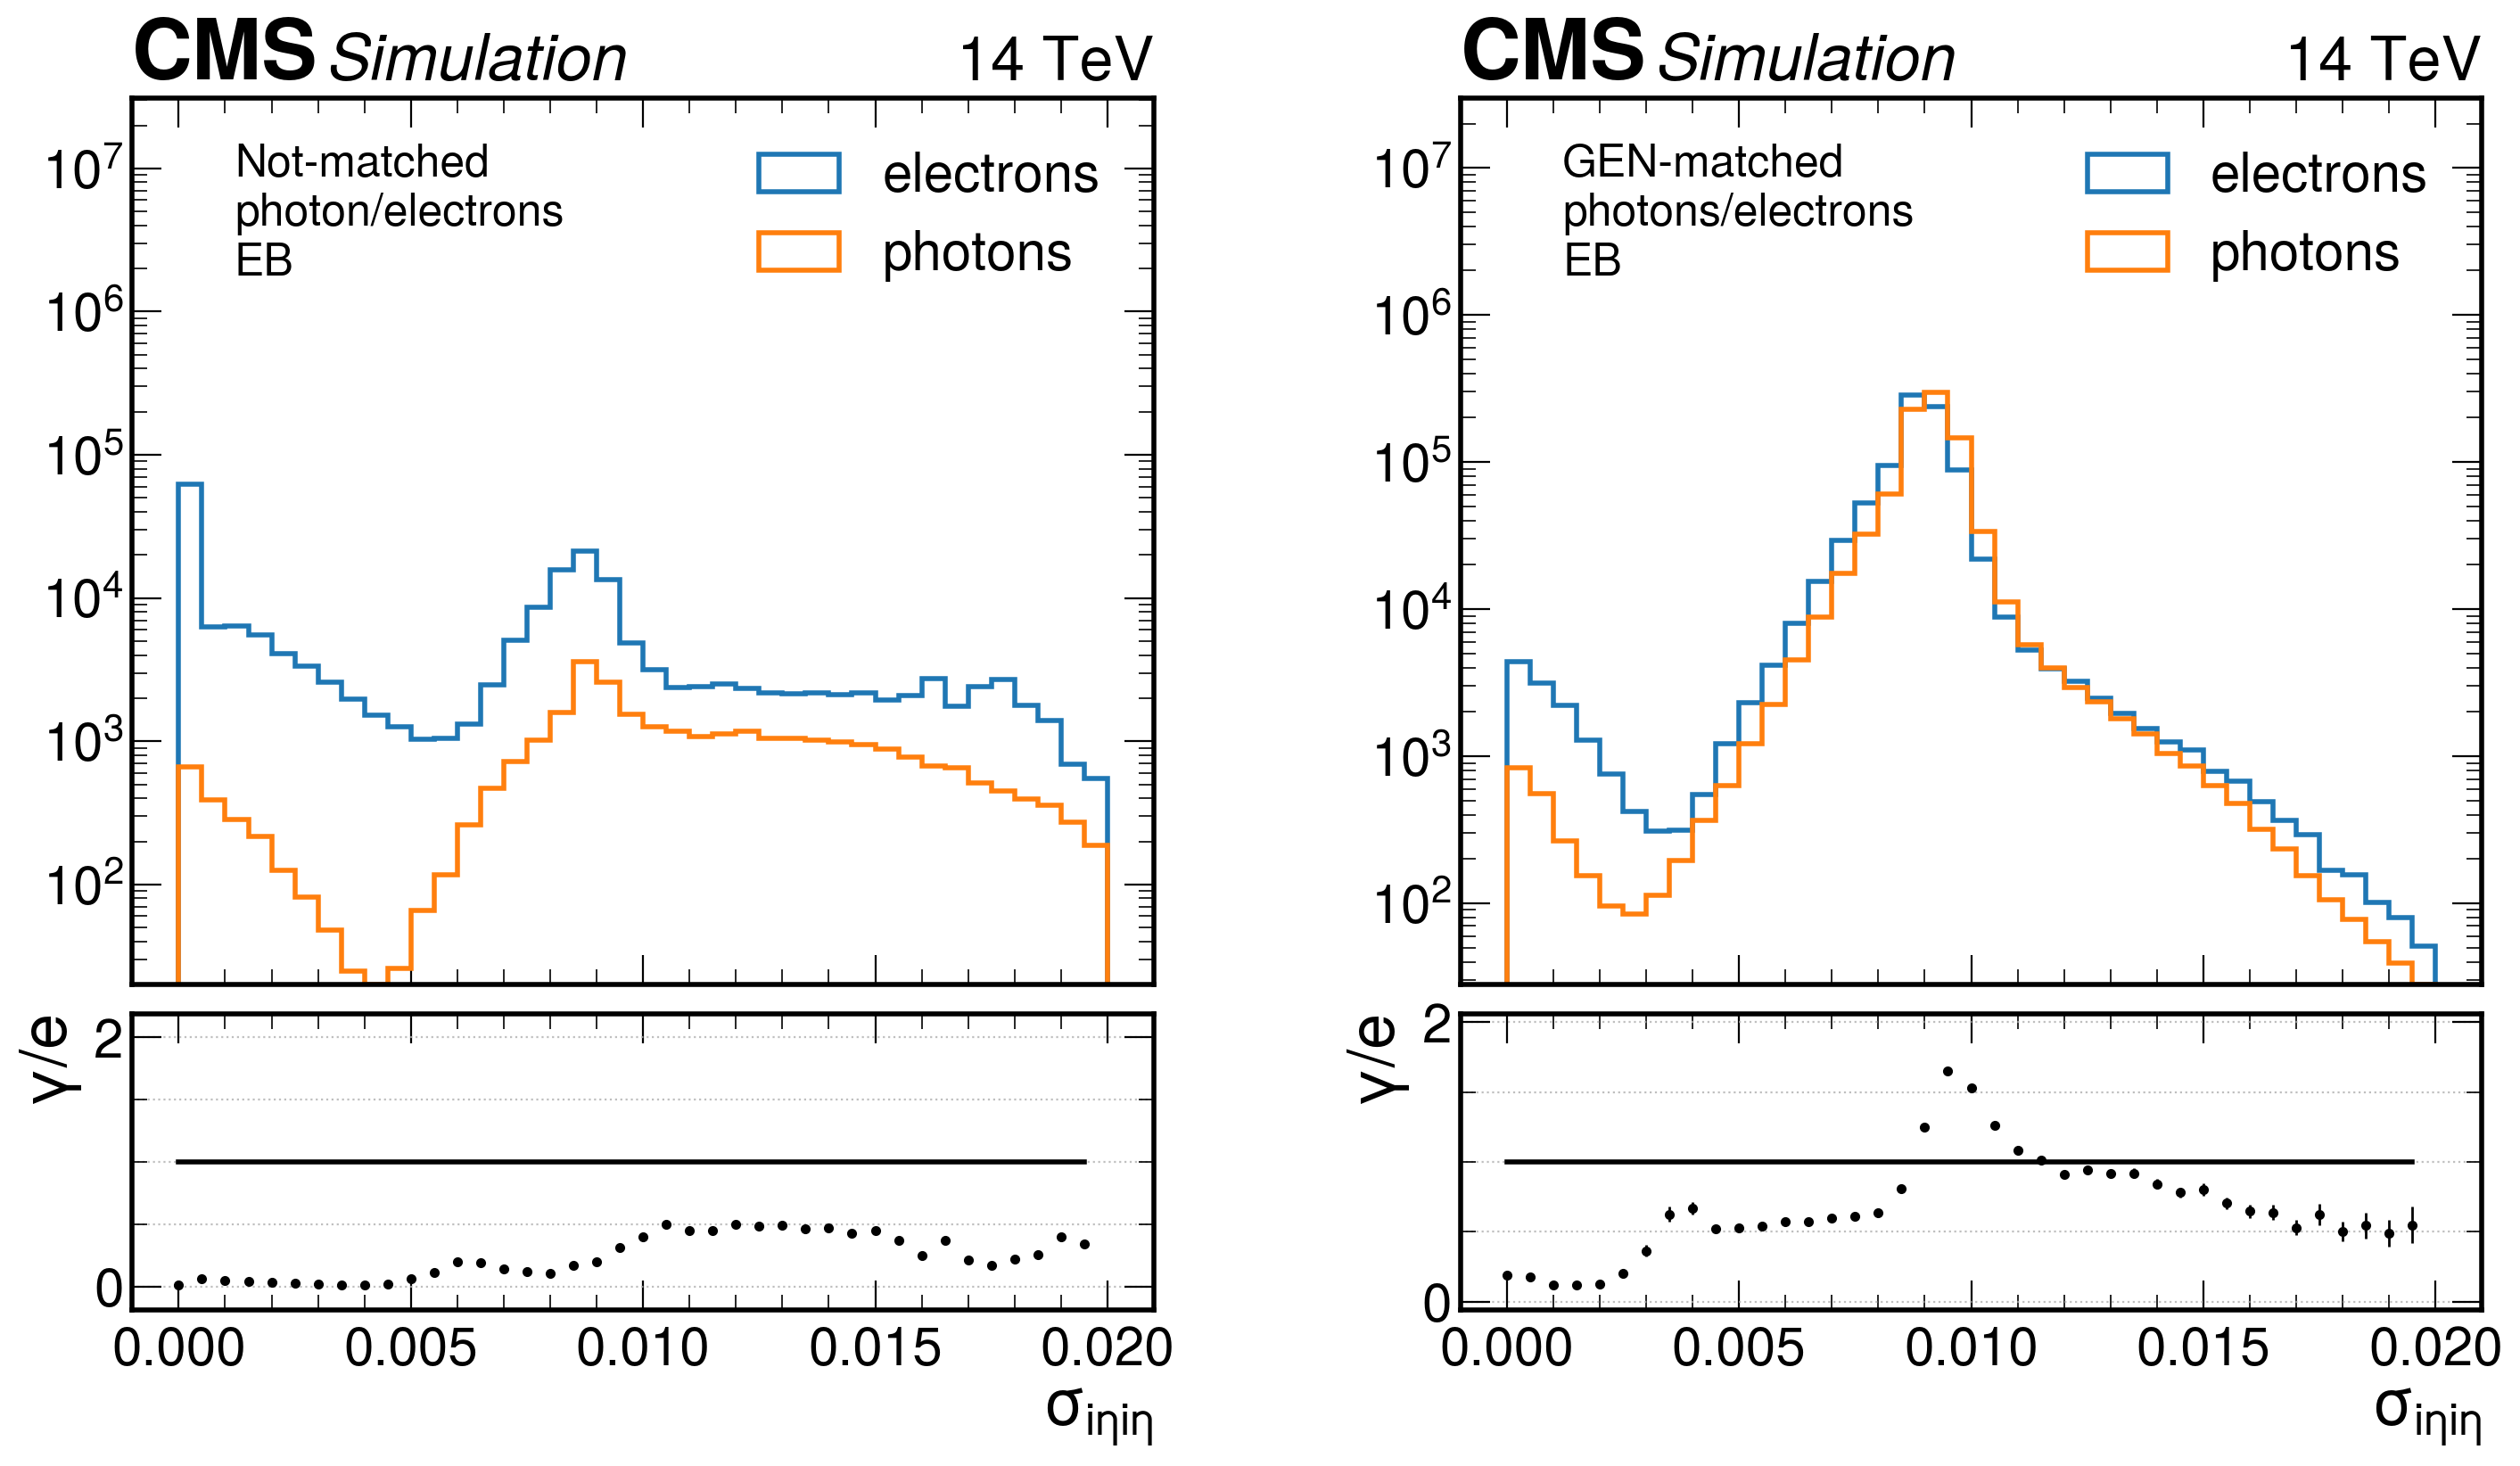

In [19]:
plot_distribution("pho_sigmaIEtaIEta", "ele_sigmaIEtaIEta", "$\sigma_{i\eta i\eta}$", 40, (0,0.02), 
                  output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="EB")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


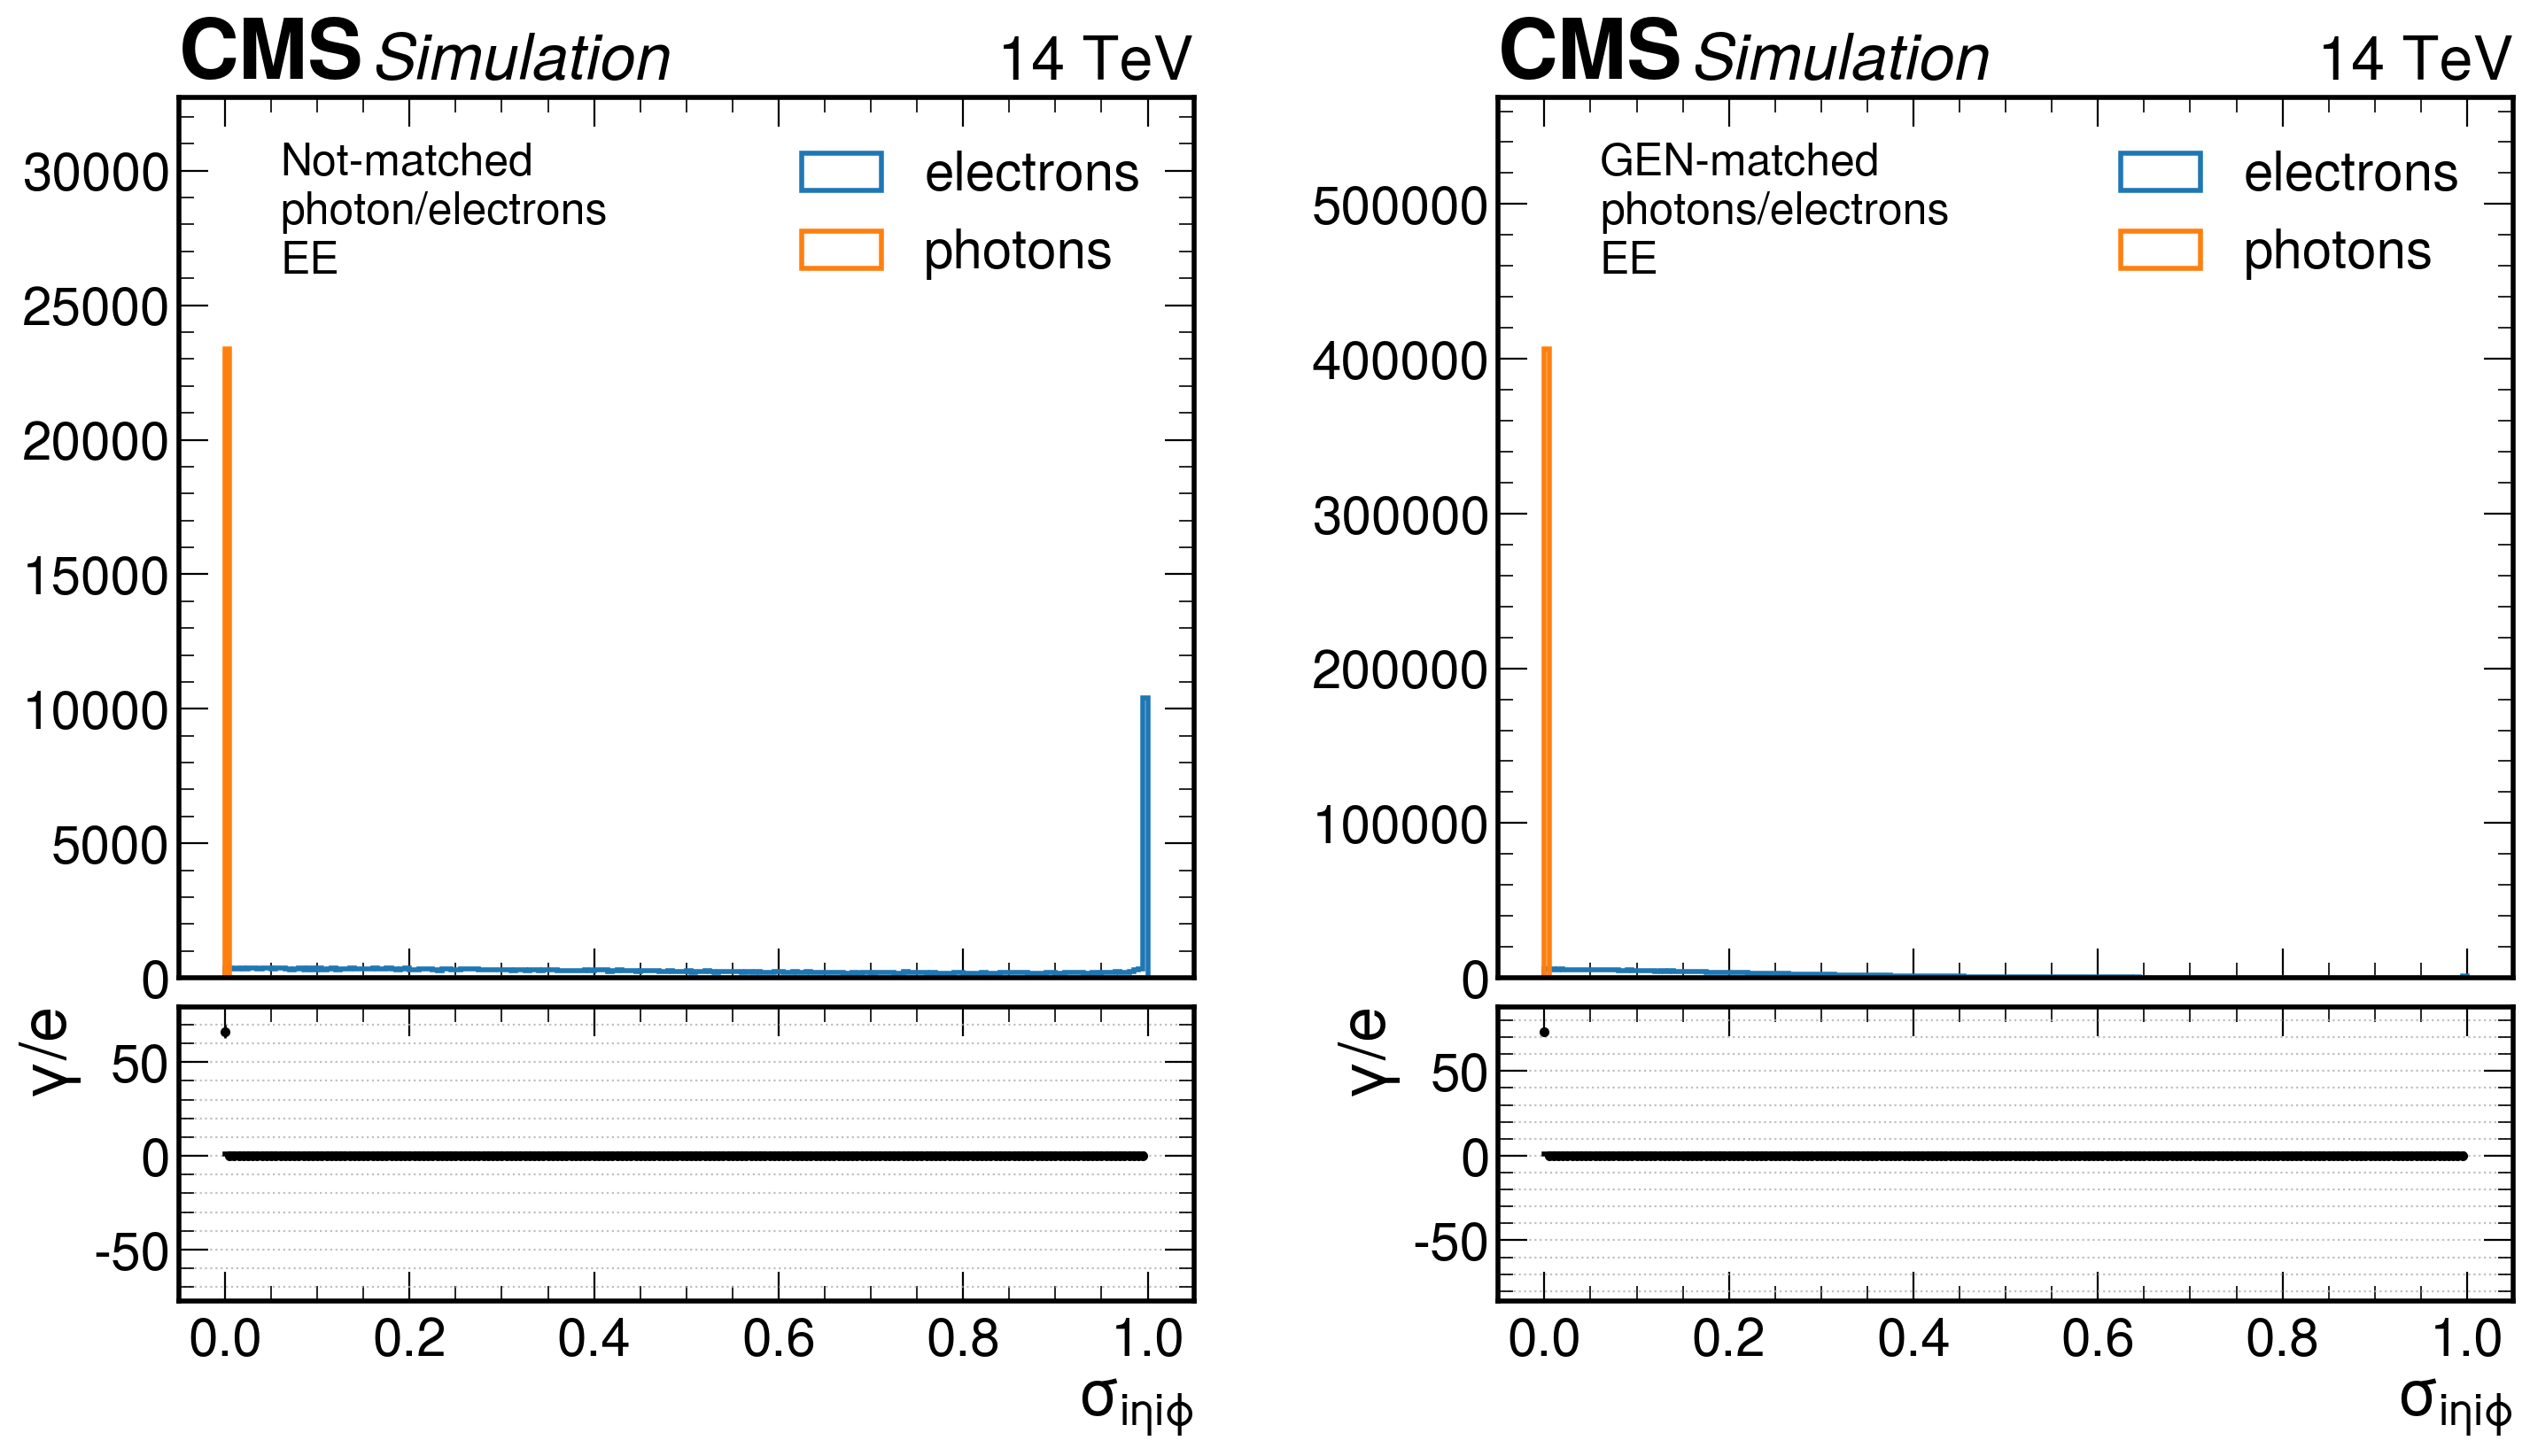

In [20]:
#Pour sigma ieta iphi, les ranges ne sont pas du tout les memes pour photons et electrons Pour les électrons c'est dans (0, 1) alors que pour les photons c'est dans (0, 0.001) donc les deux sont très différents
plot_distribution("pho_sigmaIEtaIPhi", "ele_sigmaIEtaIPhi", "$\sigma_{i\eta i\phi}$", 200, (0,1), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EE")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
2


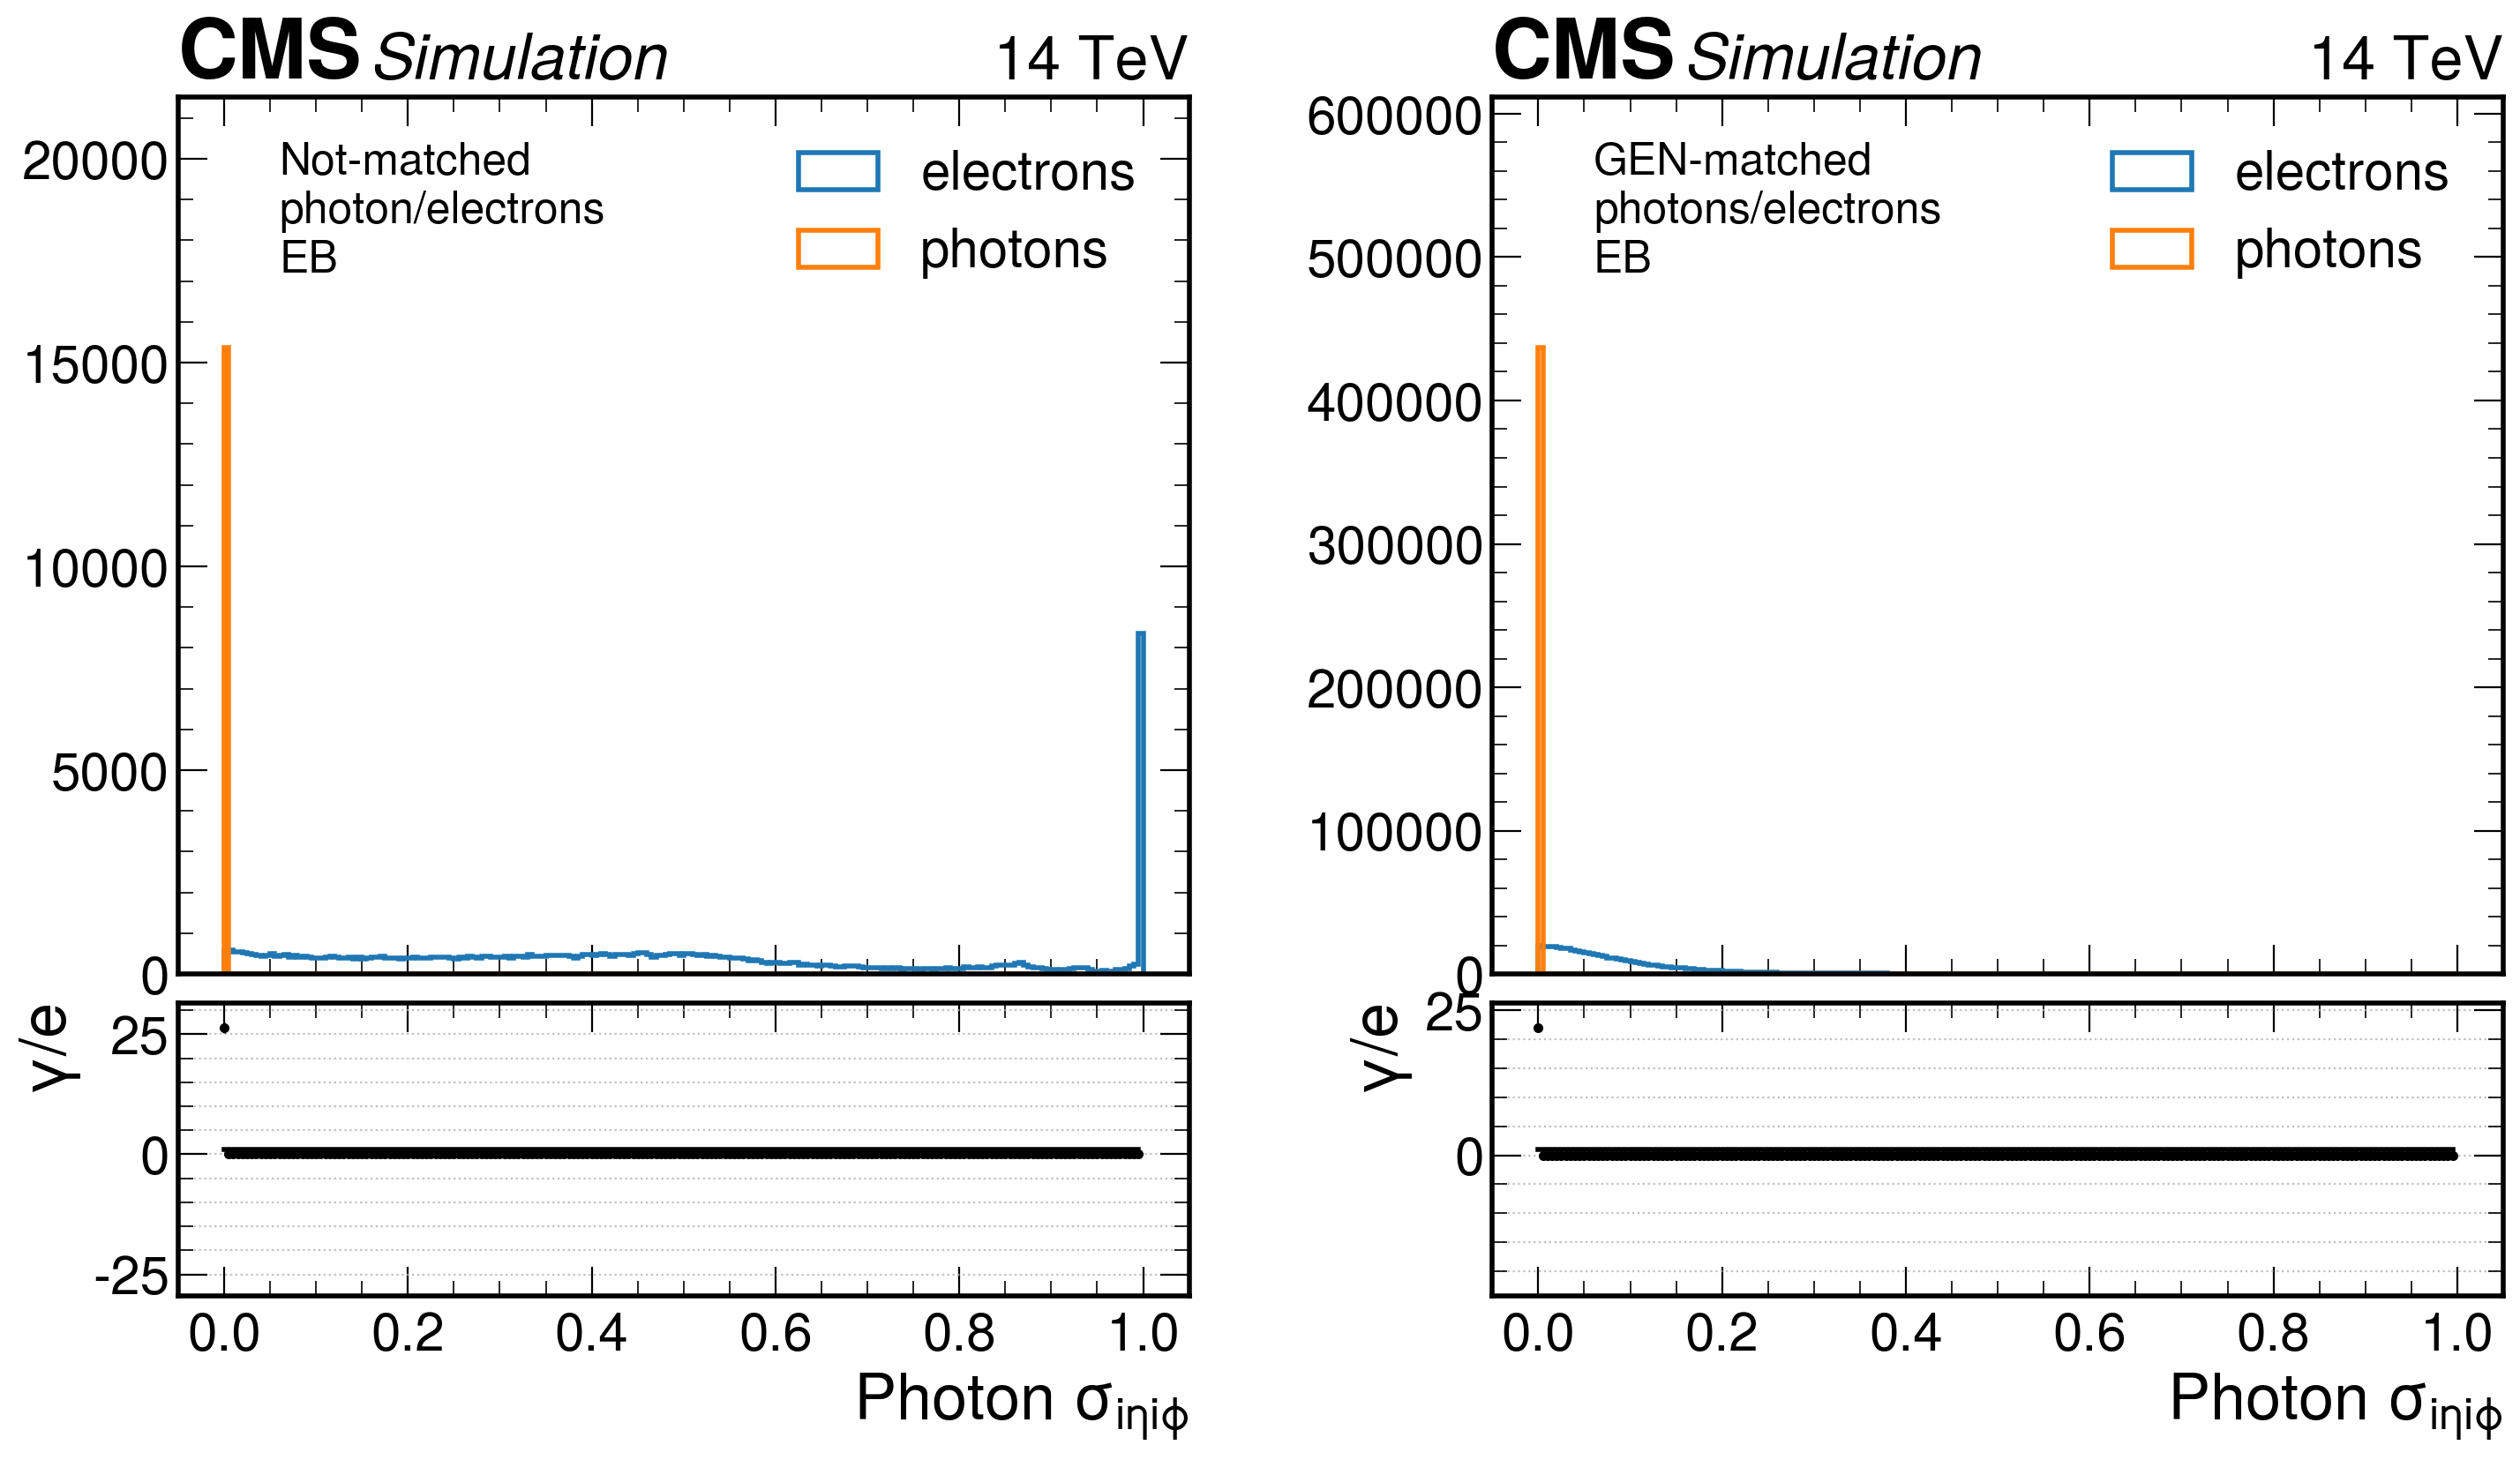

In [21]:
#Pour sigma ieta iphi, les ranges ne sont pas du tout les memes pour photons et electrons Pour les électrons c'est dans (0, 1) alors que pour les photons c'est dans (0, 0.0001) donc les deux sont très différents
plot_distribution("pho_sigmaIEtaIPhi", "ele_sigmaIEtaIPhi", "Photon $\sigma_{i\eta i\phi}$", 200, (0,1), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EB")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


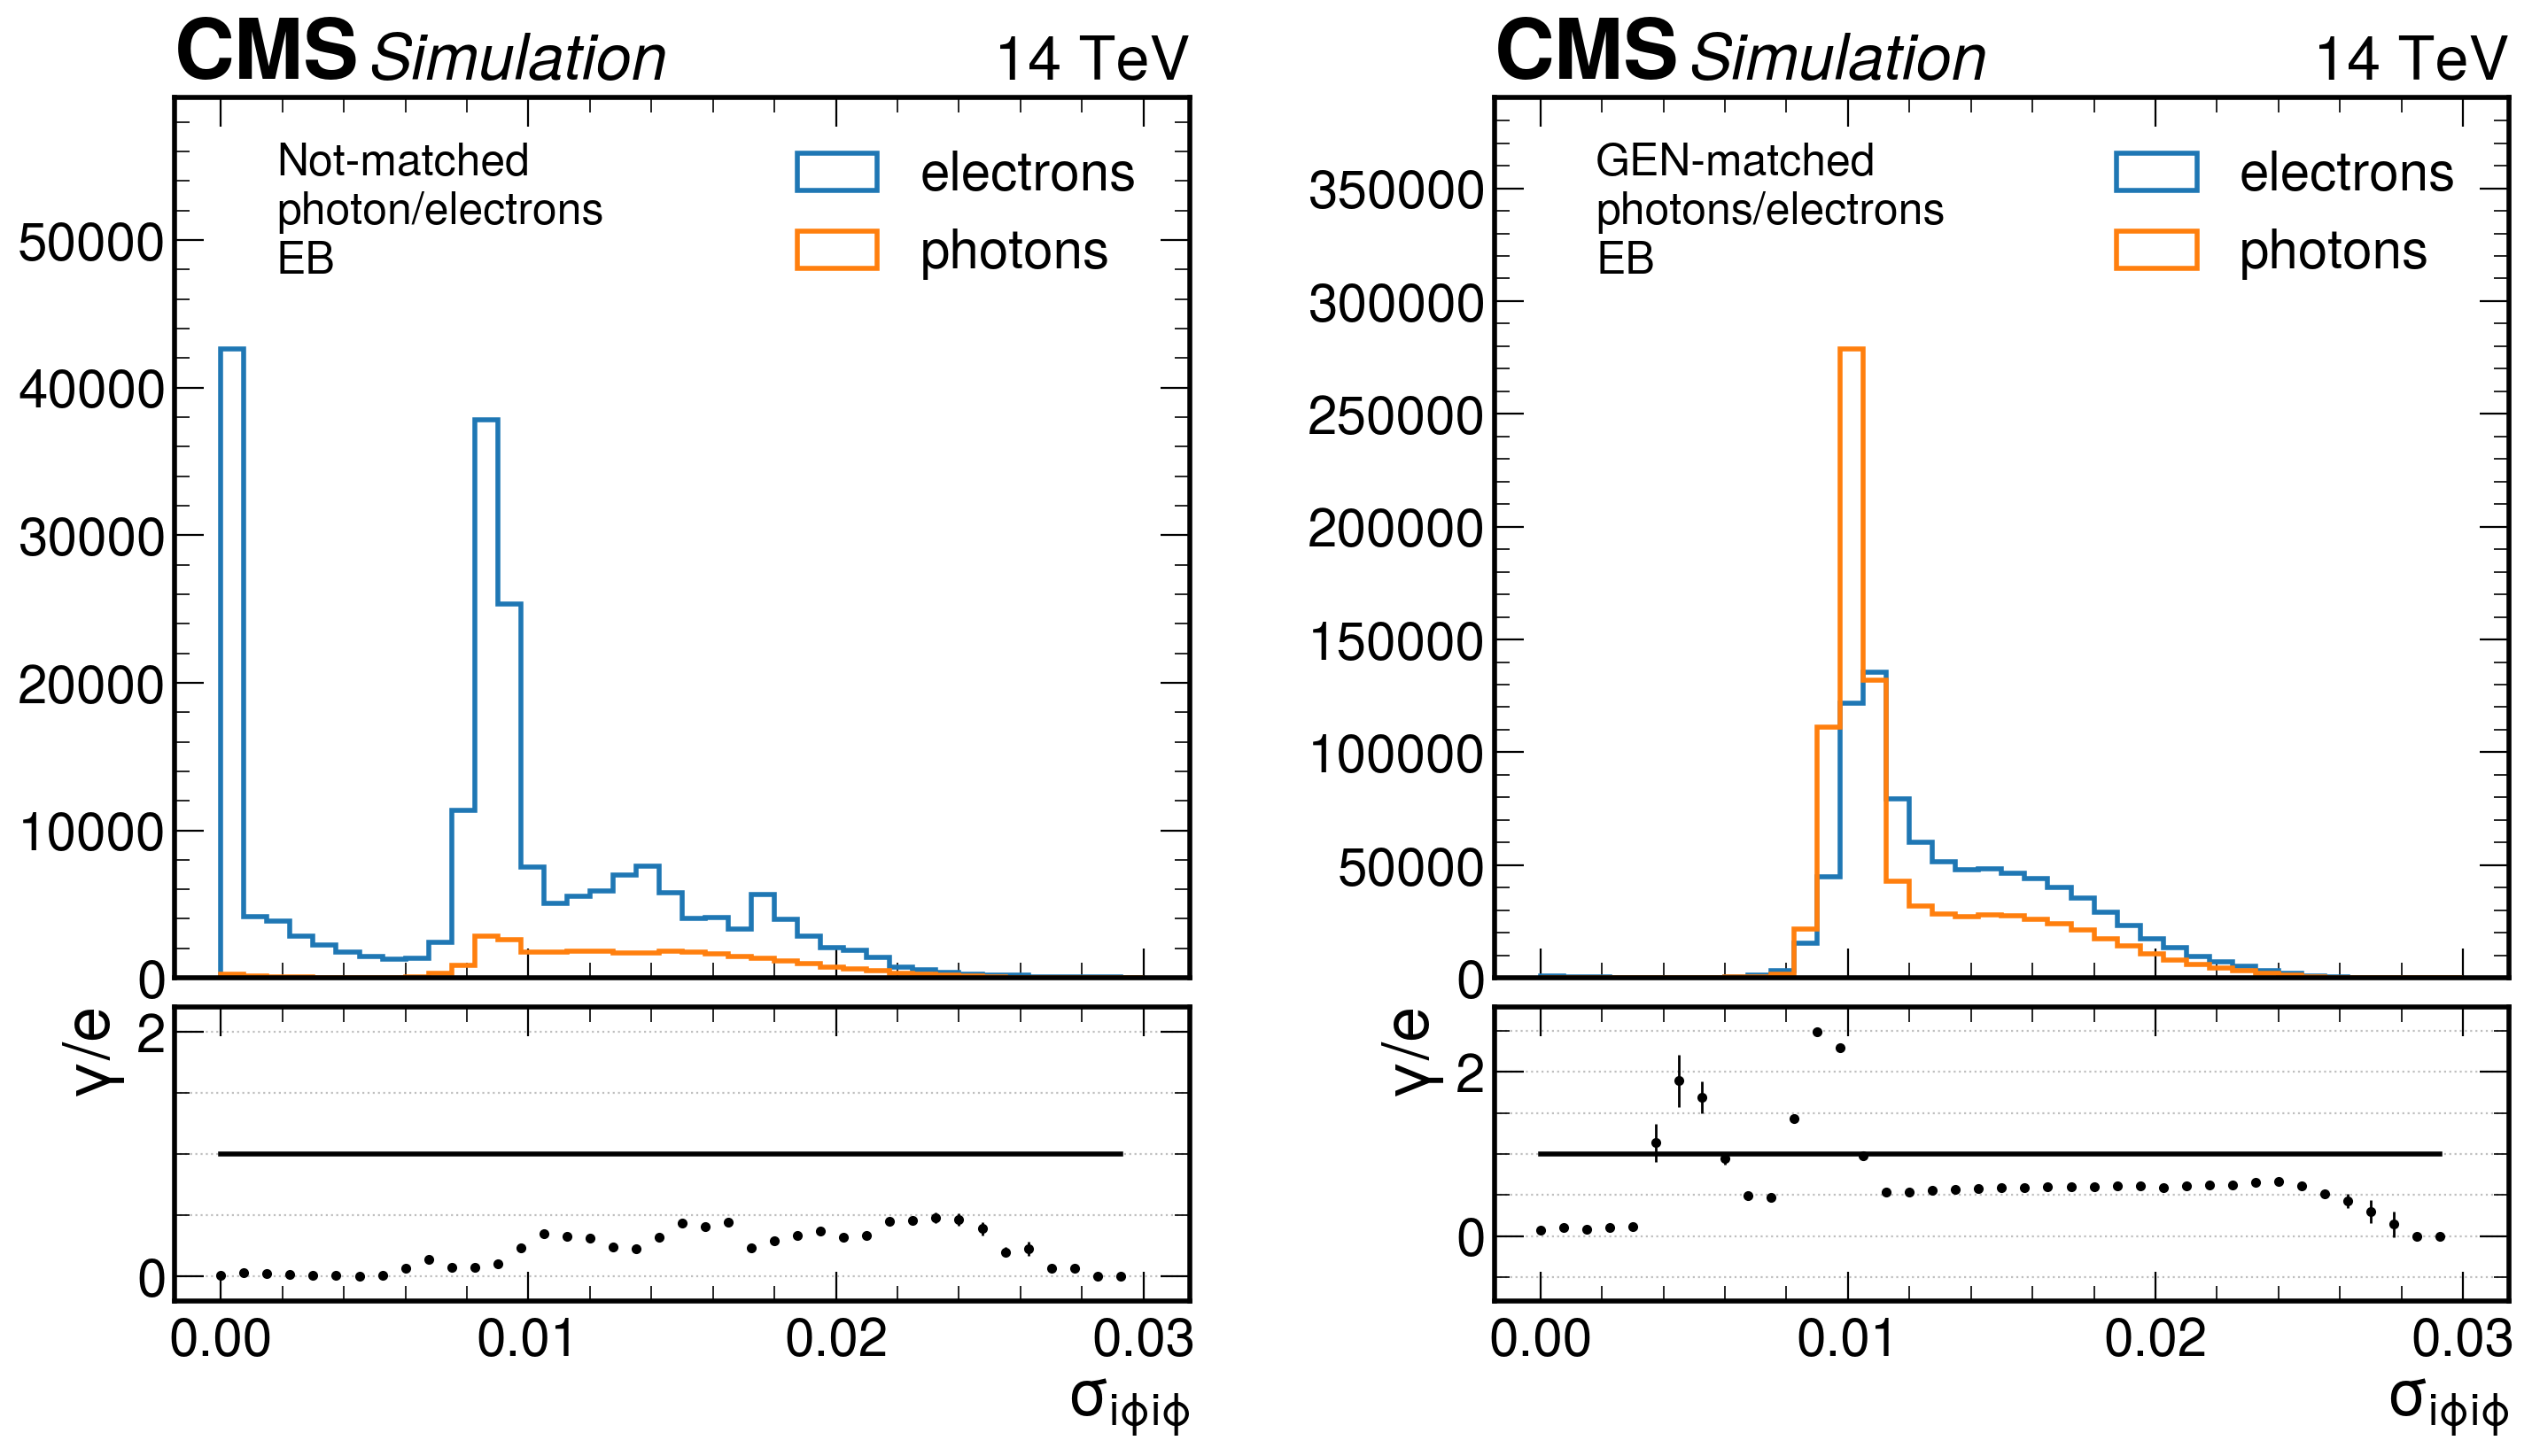

In [22]:
plot_distribution("pho_sigmaIPhiIPhi", "ele_sigmaIPhiIPhi", "$\sigma_{i\phi i\phi}$", 40, (0,0.03), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EB")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
2


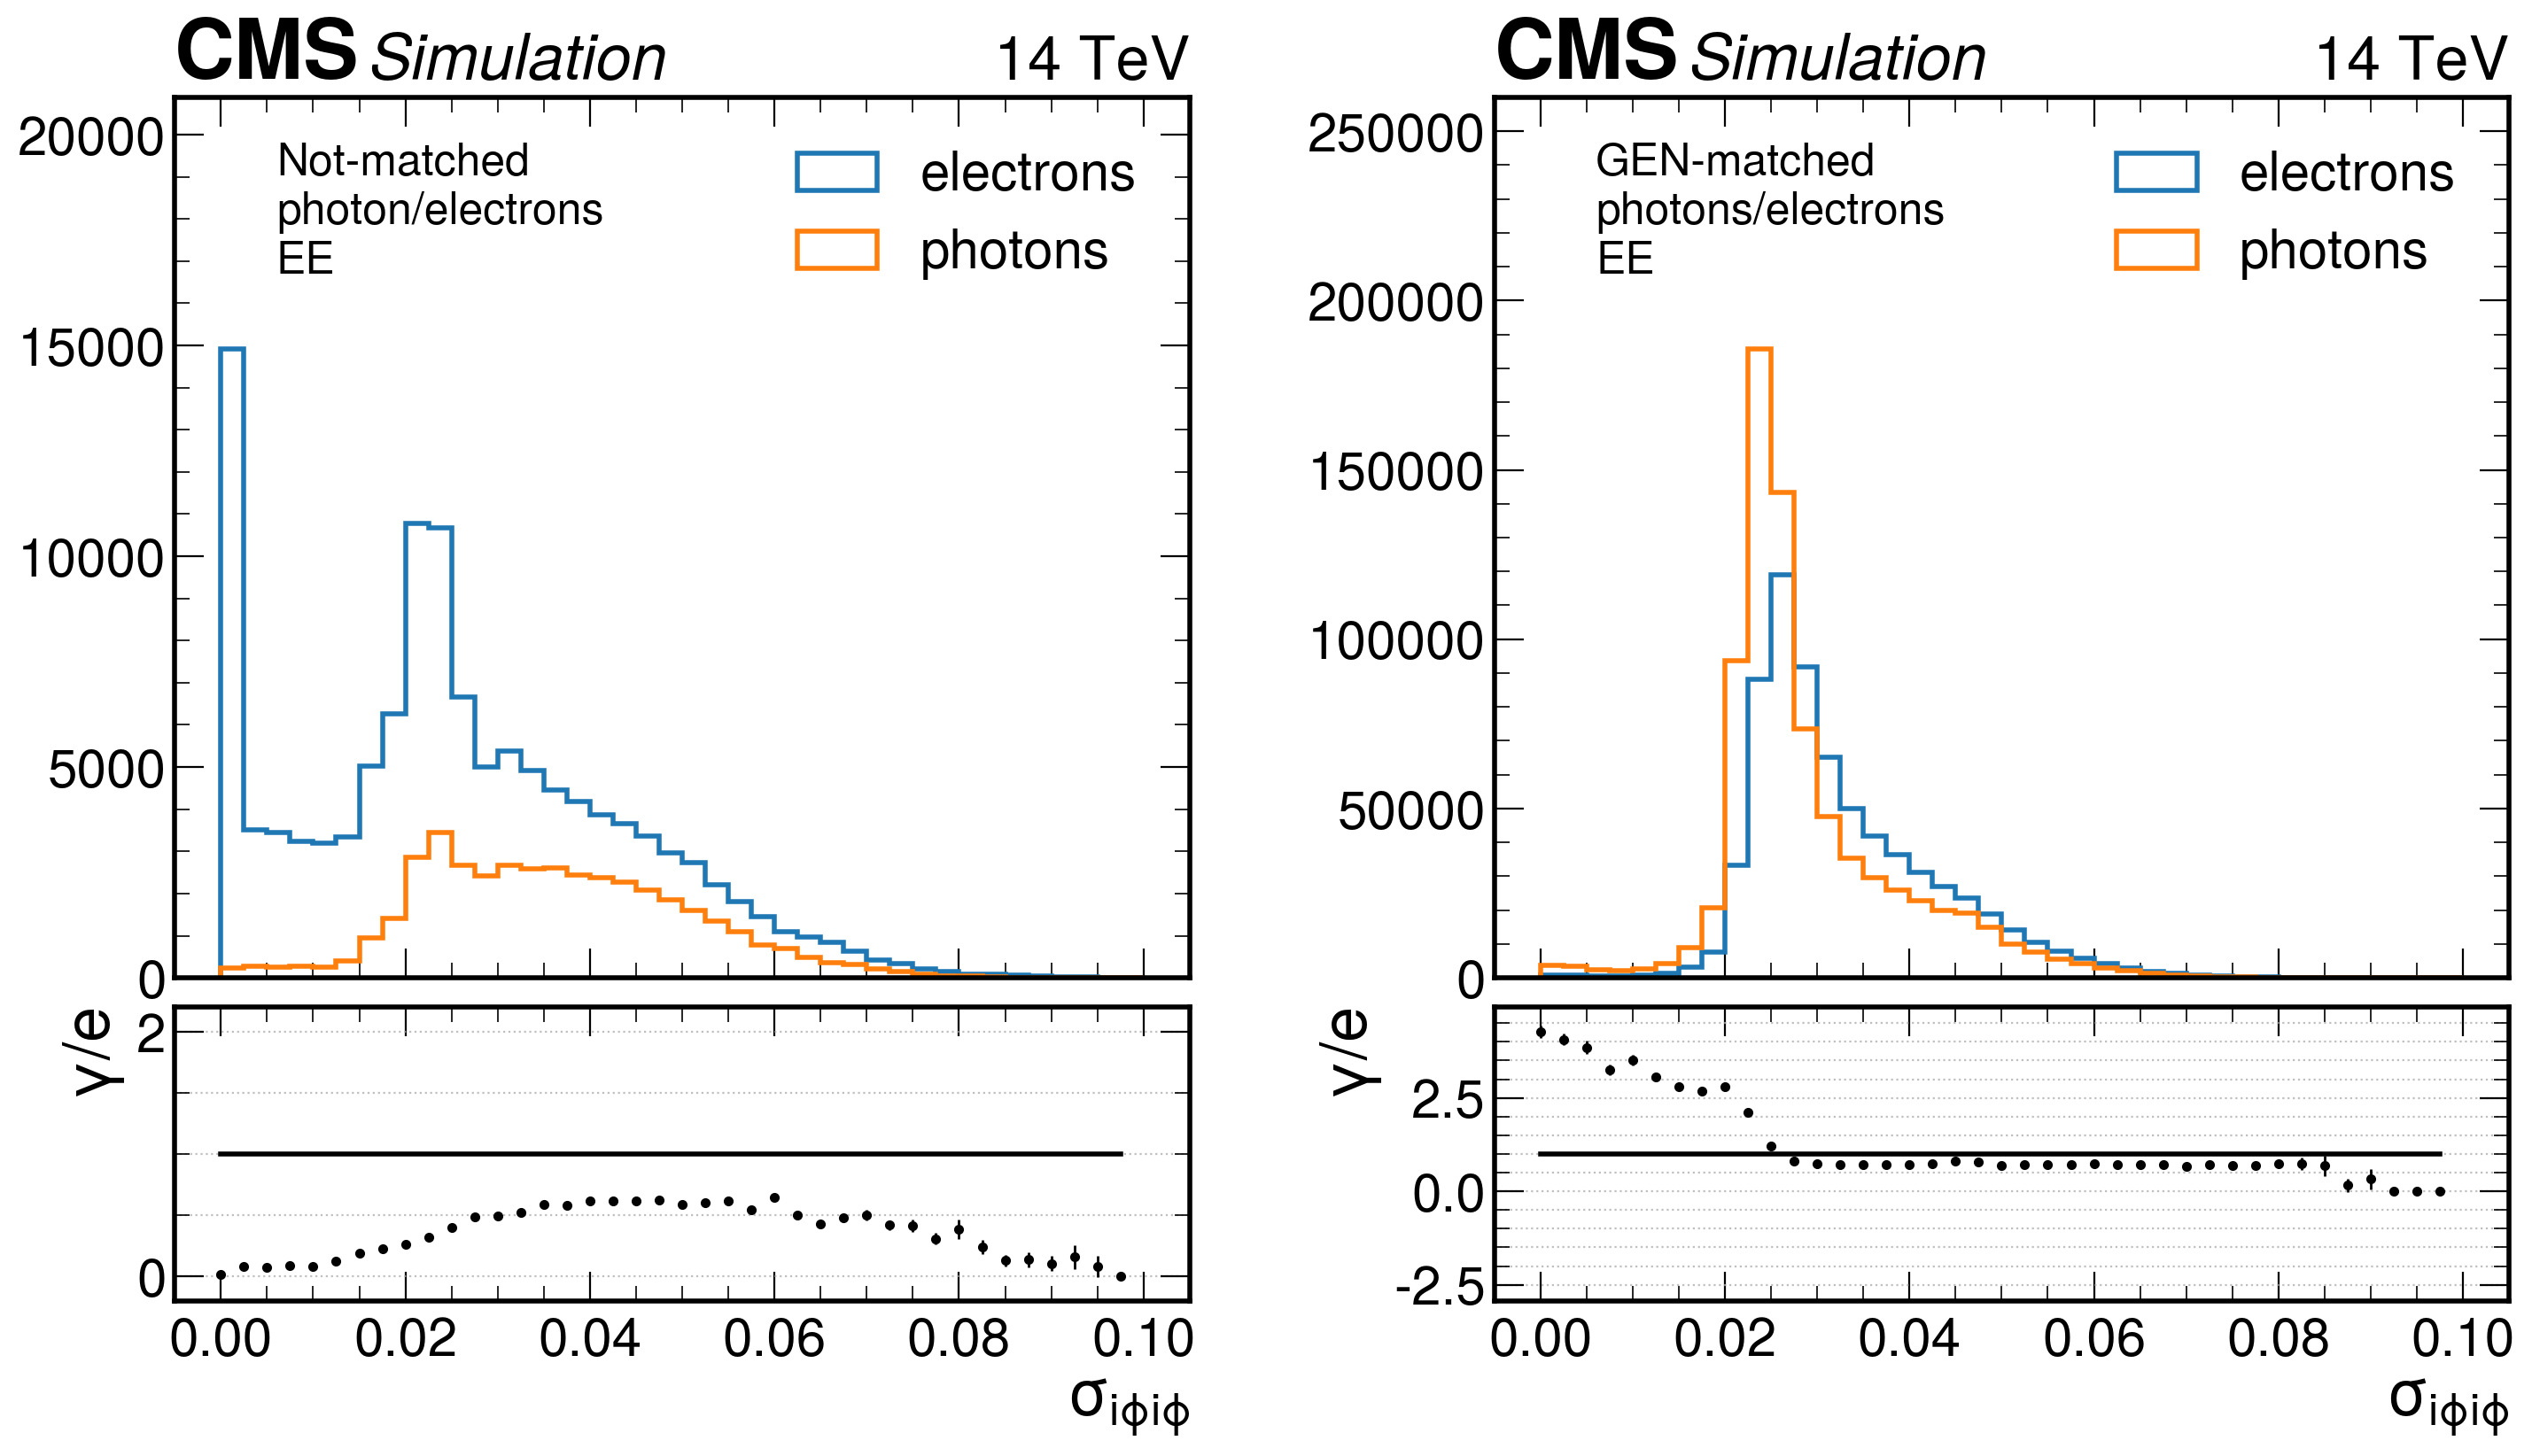

In [23]:
plot_distribution("pho_sigmaIPhiIPhi", "ele_sigmaIPhiIPhi","$\sigma_{i\phi i\phi}$", 40, (0,0.1), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EE")

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
1
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


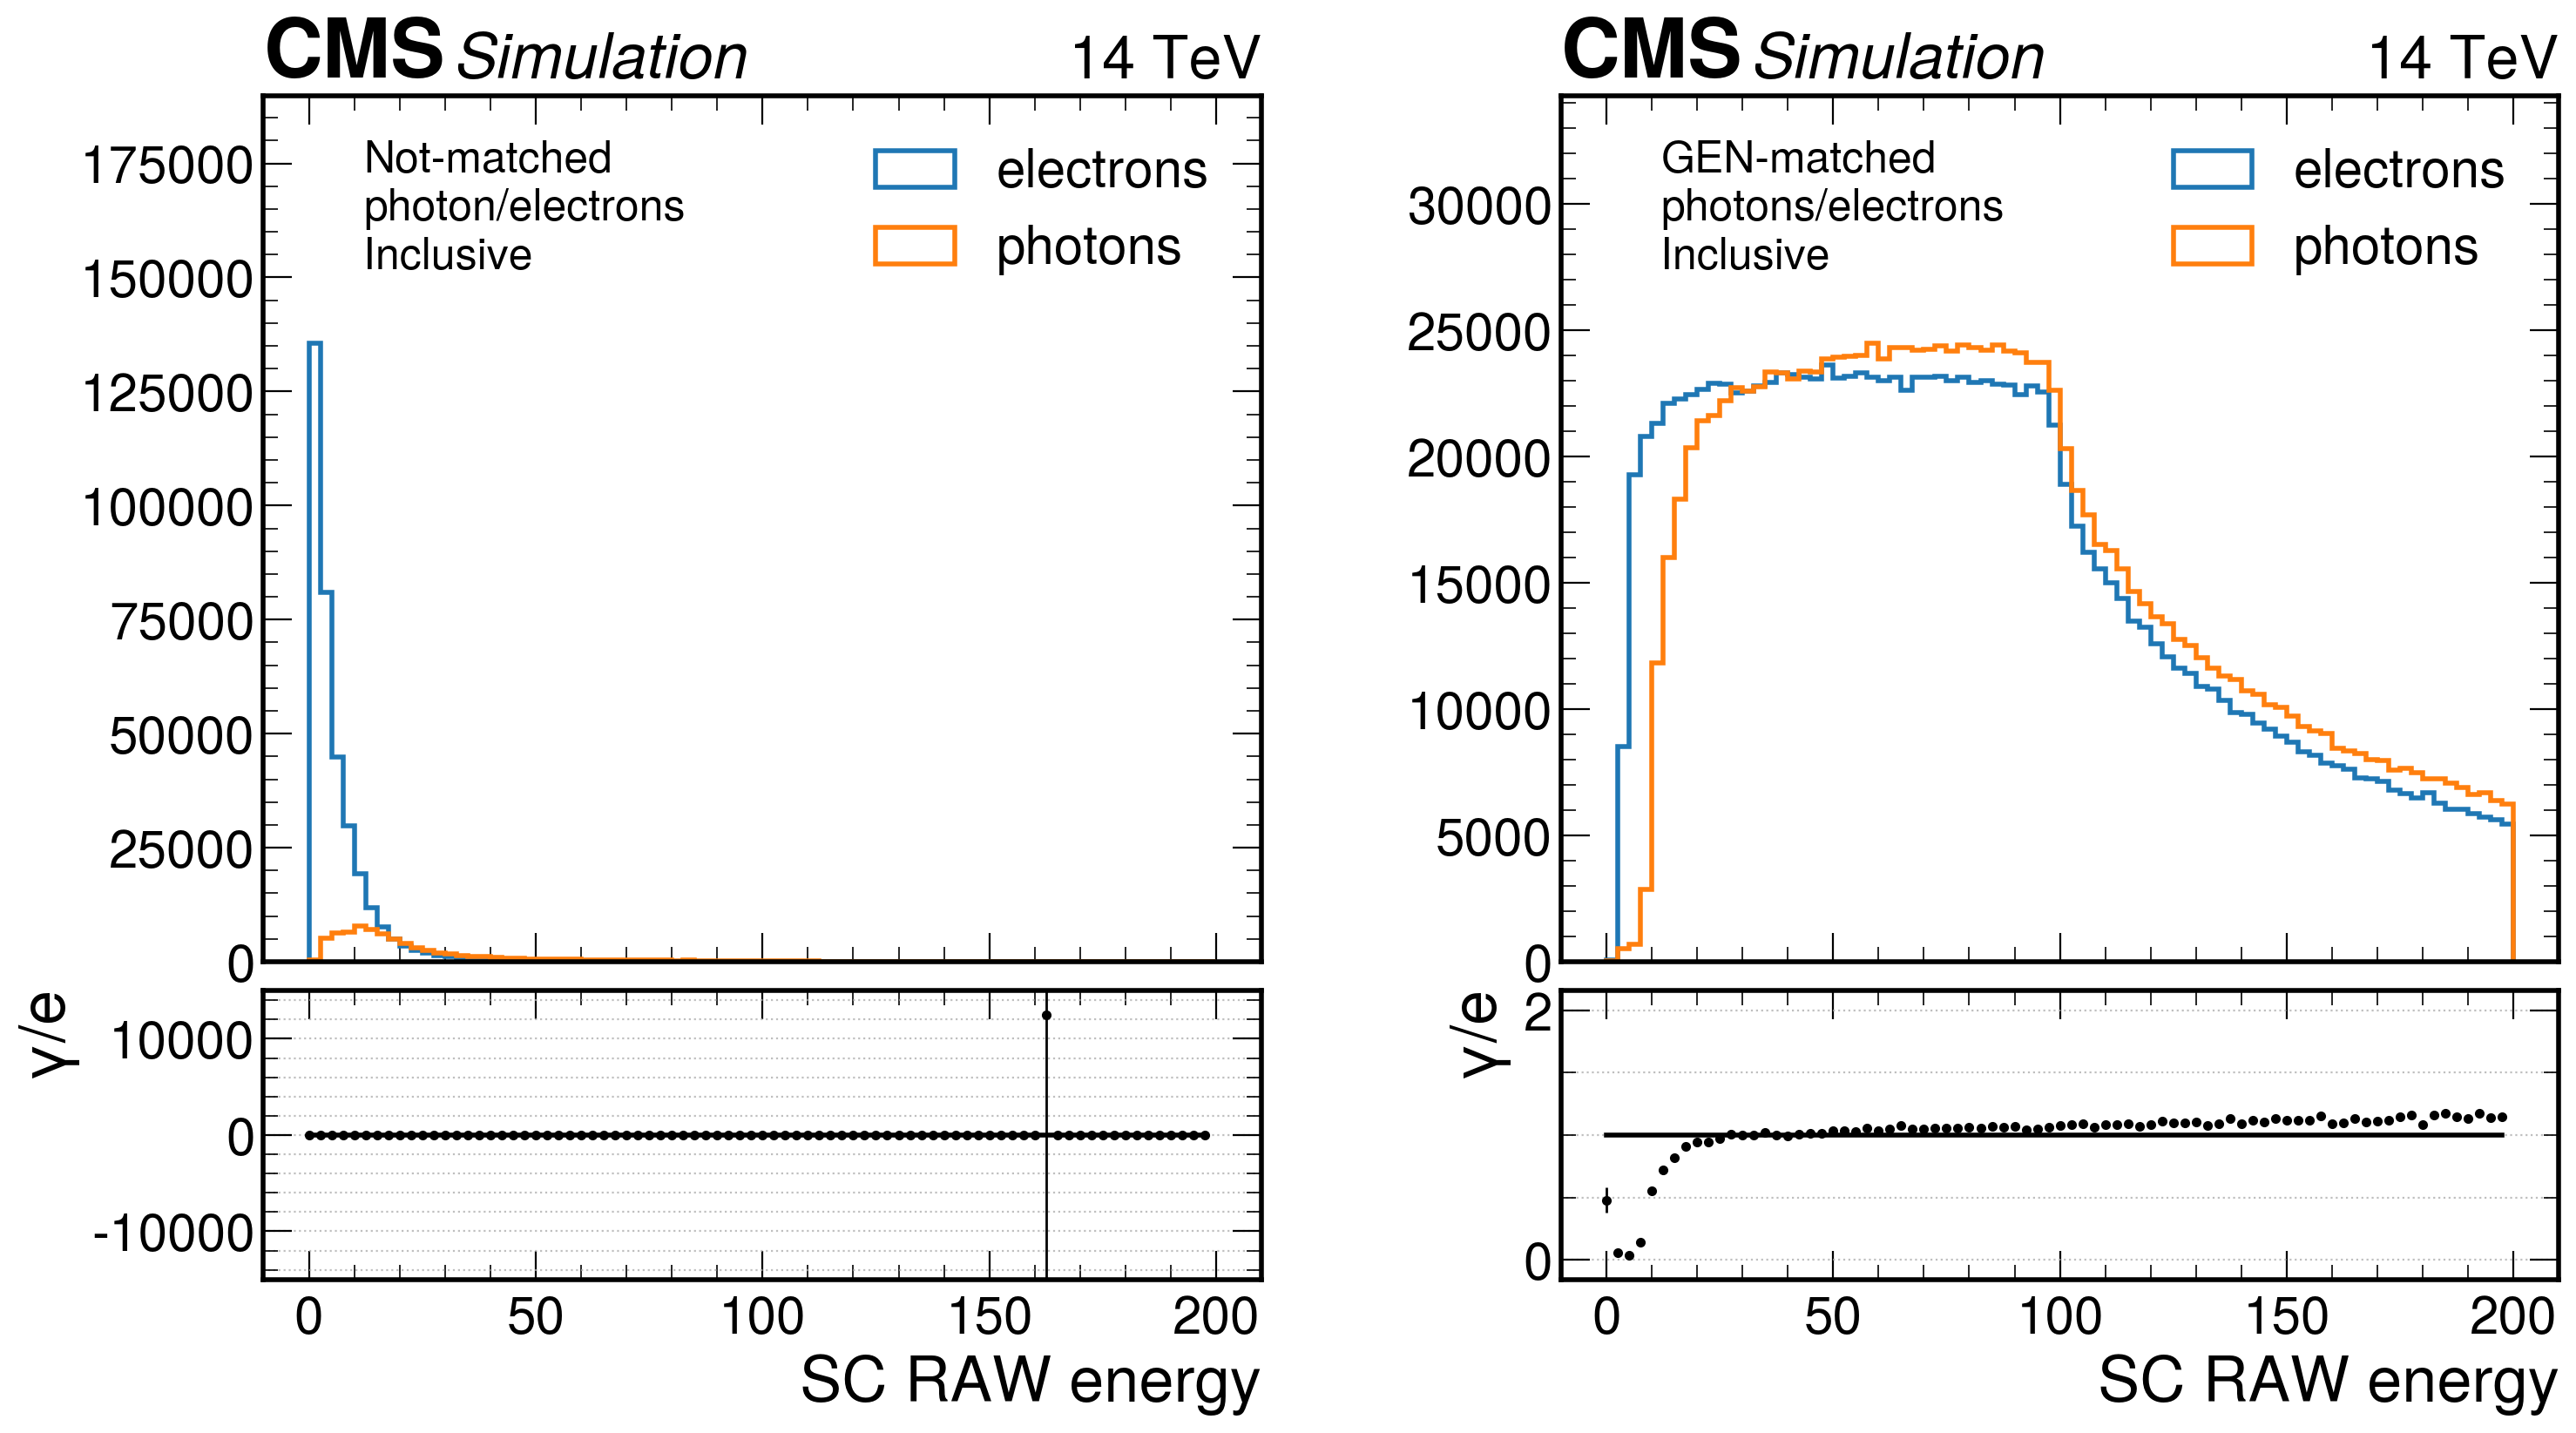

In [24]:
plot_distribution("pho_scRawEnergy", "ele_scRawEnergy", "SC RAW energy", 80, (0,200), 
                  output_folder+"/basic_distribution_comparison", ylog=False)

Le nombre de bins où B = 0 donc le rapport ne peut pas être calculé est :
0
Le nombre de bins où B = 0 et donc le rapport ne peut pas être calculé est :
0


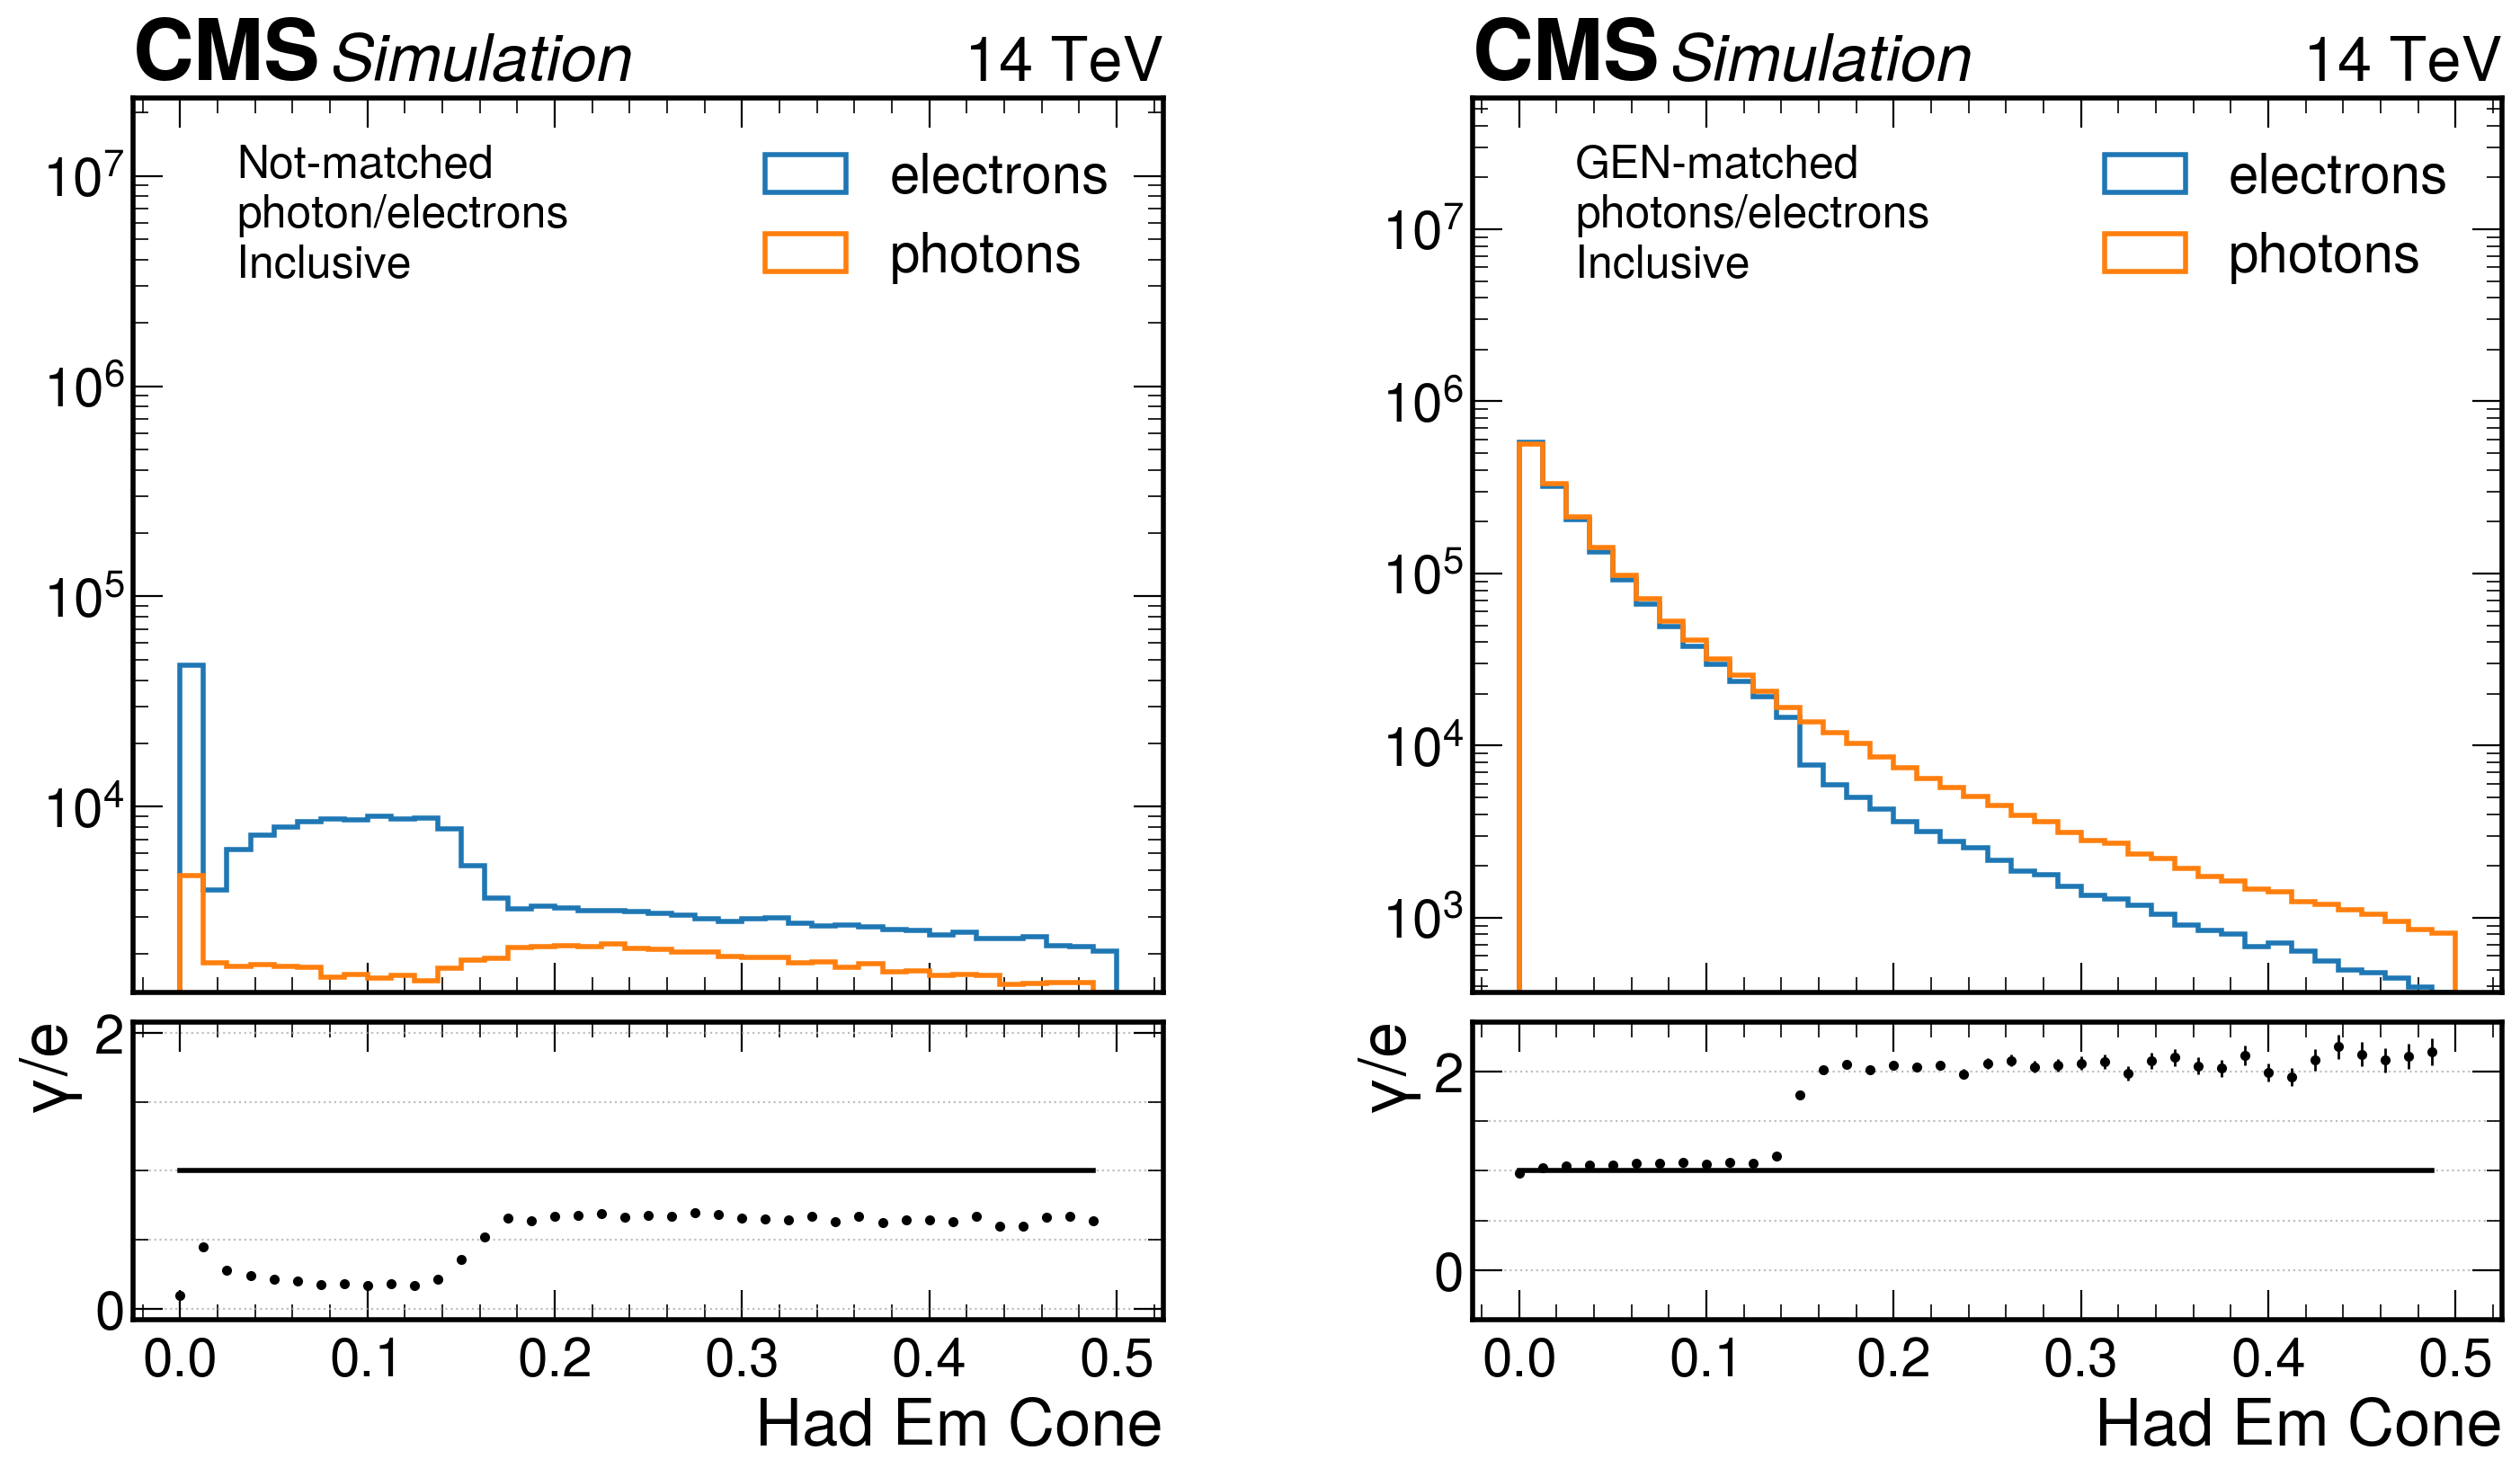

In [25]:
plot_distribution("pho_hademCone", "ele_hademCone", "Had Em Cone", 40, (0,0.5), 
                  output_folder+"/basic_distribution_comparison", ylog=True)

# Gen-matched resolution plots

### Now genmatching the dataset

In [26]:
# for Gamma analysis
dfm_pho = df_pho[(df_pho.genmatched == 1)&(df_pho.genpart_et>=10) & (df_pho.pho_et >= 10)]
dfm_ele = df_ele[(df_ele.genmatched == 1)&(df_ele.genpart_et>=10) & (df_ele.ele_et >= 10)]

dfm_pho["SC_Eraw_ov_Esim"] = dfm_pho.en_sc_raw / dfm_pho.calo_en_sim
dfm_pho["SC_Ecorr_ov_Esim"] = dfm_pho.en_sc_calib / dfm_pho.calo_en_sim
dfm_ele["SC_Eraw_ov_Esim"] = dfm_ele.en_sc_raw / dfm_ele.calo_en_sim
dfm_ele["SC_Ecorr_ov_Esim"] = dfm_ele.en_sc_calib / dfm_ele.calo_en_sim

dfm_pho["SC_Eraw_ov_EGen"] = dfm_pho.en_sc_raw / dfm_pho.genpart_en
dfm_pho["SC_Ecorr_ov_EGen"] = dfm_pho.en_sc_calib / dfm_pho.genpart_en
dfm_ele["SC_Eraw_ov_EGen"] = dfm_ele.en_sc_raw / dfm_ele.genpart_en
dfm_ele["SC_Ecorr_ov_EGen"] = dfm_ele.en_sc_calib / dfm_ele.genpart_en

dfm_pho["Pho_Eraw_ov_EGen"] = dfm_pho.pho_energy / dfm_pho.genpart_en
dfm_pho["Pho_Ecorr_ov_EGen"] = dfm_pho.pho_energy / dfm_pho.genpart_en
dfm_ele["Ele_Eraw_ov_EGen"] = dfm_ele.ele_energy / dfm_ele.genpart_en
dfm_ele["Ele_Ecorr_ov_EGen"] = dfm_ele.ele_energy / dfm_ele.genpart_en

/tmp/ipykernel_3600/1859491179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_pho["SC_Eraw_ov_Esim"] = dfm_pho.en_sc_raw / dfm_pho.calo_en_sim
/tmp/ipykernel_3600/1859491179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_pho["SC_Ecorr_ov_Esim"] = dfm_pho.en_sc_calib / dfm_pho.calo_en_sim
/tmp/ipykernel_3600/1859491179.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

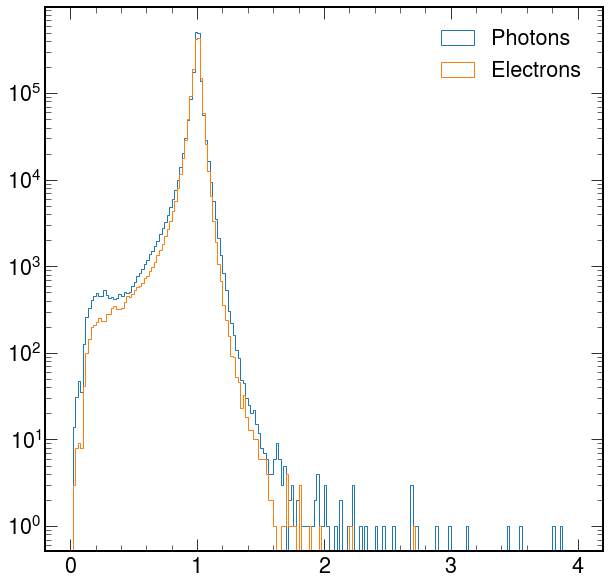

In [27]:
plt.hist(dfm_pho.Pho_Ecorr_ov_EGen, bins=200, range=(0,4), histtype="step", label="Photons")
plt.hist(dfm_ele.Ele_Ecorr_ov_EGen, bins=200, range=(0,4), histtype="step", label="Electrons")
plt.yscale("log")
plt.legend()